# Snake

In [1]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)
for gpu in physical_devices:
    tf.config.experimental.set_memory_growth(gpu, True)

tf.random.set_seed(0)

import environments_fully_observable 
import environments_partially_observable
import numpy as np
from tqdm import trange
import matplotlib.pyplot as plt
import os
import random
# import tensorflow as tf
# tf.random.set_seed(0)
random.seed(0)
np.random.seed(0)

# GPU configuration
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("TensorFlow version:", tf.__version__)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs Available:  1
TensorFlow version: 2.10.1


## Environment definition

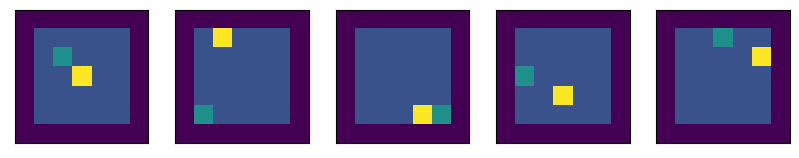

In [2]:
%matplotlib inline
# function to standardize getting an env for the whole notebook
def get_env(n=1000, partially_observable=False):
    # n is the number of boards that you want to simulate parallely
    # size is the size of each board, also considering the borders
    # mask for the partially observable, is the size of the local neighborhood
    size = 7
    if partially_observable:
        e = environments_partially_observable.OriginalSnakeEnvironment(n, size, 3)
    else:
        e = environments_fully_observable.OriginalSnakeEnvironment(n, size)
    # or environments_partially_observable.OriginalSnakeEnvironment(n, size, 2)
    return e
env_ = get_env()
GAMMA = .9
ITERATIONS = 5000

fig,axs=plt.subplots(1,min(len(env_.boards), 5), figsize=(10,3))
for ax, board in zip(axs, env_.boards):
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
    ax.imshow(board, origin="lower")

## DQN Agent

In [3]:
from dqn import DQNAgent

agent = DQNAgent(state_shape=env_.to_state().shape[1:], gamma=GAMMA, n_actions=4, epsilon_start=1., epsilon_end=0.05, epsilon_decay=0.9995, learning_rate=1e-4, target_update_freq=100)

## Training

In [4]:
from training import training

rewards_history_dqn, wall_hits_dqn, fruits_eaten_dqn, loss_history_dqn = training(ITERATIONS, env_, agent, save_weights=True, save_path="weights/", file_name="snake_dqn_weights.h5")

  0%|          | 1/5000 [00:01<2:29:47,  1.80s/it]

Iteration 0: Avg Reward: 0.00, Avg Loss: 0.0428
Fruits eaten: 40, Max fruits eaten: 40
Wall hits: 192


  2%|▏         | 101/5000 [01:39<1:19:07,  1.03it/s]

Iteration 100: Avg Reward: -0.01, Avg Loss: 0.0087
Fruits eaten: 38, Max fruits eaten: 40
Wall hits: 24


  4%|▍         | 201/5000 [03:16<1:20:15,  1.00s/it]

Iteration 200: Avg Reward: -0.01, Avg Loss: 0.0067
Fruits eaten: 16, Max fruits eaten: 40
Wall hits: 193


  6%|▌         | 301/5000 [05:16<1:38:19,  1.26s/it]

Iteration 300: Avg Reward: -0.01, Avg Loss: 0.0067
Fruits eaten: 16, Max fruits eaten: 40
Wall hits: 189


  8%|▊         | 401/5000 [06:59<1:17:08,  1.01s/it]

Iteration 400: Avg Reward: -0.01, Avg Loss: 0.0072
Fruits eaten: 21, Max fruits eaten: 40
Wall hits: 188


 10%|█         | 501/5000 [08:41<1:17:41,  1.04s/it]

Iteration 500: Avg Reward: -0.01, Avg Loss: 0.0071
Fruits eaten: 22, Max fruits eaten: 40
Wall hits: 184


 12%|█▏        | 601/5000 [10:21<1:11:02,  1.03it/s]

Iteration 600: Avg Reward: -0.00, Avg Loss: 0.0089
Fruits eaten: 24, Max fruits eaten: 40
Wall hits: 180


 14%|█▍        | 701/5000 [11:58<1:08:30,  1.05it/s]

Iteration 700: Avg Reward: 0.00, Avg Loss: 0.0088
Fruits eaten: 29, Max fruits eaten: 40
Wall hits: 162


 16%|█▌        | 801/5000 [13:37<1:11:38,  1.02s/it]

Iteration 800: Avg Reward: 0.00, Avg Loss: 0.0091
Fruits eaten: 16, Max fruits eaten: 40
Wall hits: 183


 18%|█▊        | 901/5000 [15:20<1:10:40,  1.03s/it]

Iteration 900: Avg Reward: 0.01, Avg Loss: 0.0107
Fruits eaten: 25, Max fruits eaten: 40
Wall hits: 199


 20%|██        | 1001/5000 [17:04<1:09:35,  1.04s/it]

Iteration 1000: Avg Reward: 0.02, Avg Loss: 0.0112
Fruits eaten: 121, Max fruits eaten: 121
Wall hits: 0


 22%|██▏       | 1101/5000 [18:46<1:06:19,  1.02s/it]

Iteration 1100: Avg Reward: 0.03, Avg Loss: 0.0141
Fruits eaten: 229, Max fruits eaten: 229
Wall hits: 1


 24%|██▍       | 1201/5000 [20:28<1:04:44,  1.02s/it]

Iteration 1200: Avg Reward: 0.03, Avg Loss: 0.0145
Fruits eaten: 272, Max fruits eaten: 272
Wall hits: 3


 26%|██▌       | 1301/5000 [22:10<1:03:00,  1.02s/it]

Iteration 1300: Avg Reward: 0.03, Avg Loss: 0.0178
Fruits eaten: 240, Max fruits eaten: 272
Wall hits: 12


 28%|██▊       | 1401/5000 [23:52<1:00:48,  1.01s/it]

Iteration 1400: Avg Reward: 0.04, Avg Loss: 0.0191
Fruits eaten: 19, Max fruits eaten: 272
Wall hits: 165


 30%|███       | 1501/5000 [25:34<58:51,  1.01s/it]  

Iteration 1500: Avg Reward: 0.04, Avg Loss: 0.0213
Fruits eaten: 261, Max fruits eaten: 272
Wall hits: 2


 32%|███▏      | 1601/5000 [27:19<1:00:52,  1.07s/it]

Iteration 1600: Avg Reward: 0.05, Avg Loss: 0.0241
Fruits eaten: 130, Max fruits eaten: 272
Wall hits: 3


 34%|███▍      | 1701/5000 [29:02<55:28,  1.01s/it]  

Iteration 1700: Avg Reward: 0.05, Avg Loss: 0.0301
Fruits eaten: 143, Max fruits eaten: 272
Wall hits: 2


 36%|███▌      | 1801/5000 [30:43<52:53,  1.01it/s]

Iteration 1800: Avg Reward: 0.05, Avg Loss: 0.0355
Fruits eaten: 296, Max fruits eaten: 296
Wall hits: 1


 38%|███▊      | 1901/5000 [32:20<49:50,  1.04it/s]

Iteration 1900: Avg Reward: 0.06, Avg Loss: 0.0329
Fruits eaten: 120, Max fruits eaten: 296
Wall hits: 4


 40%|████      | 2001/5000 [34:01<51:38,  1.03s/it]

Iteration 2000: Avg Reward: 0.07, Avg Loss: 0.0328
Fruits eaten: 280, Max fruits eaten: 296
Wall hits: 4


 42%|████▏     | 2101/5000 [35:42<46:30,  1.04it/s]

Iteration 2100: Avg Reward: 0.05, Avg Loss: 0.0400
Fruits eaten: 293, Max fruits eaten: 296
Wall hits: 2


 44%|████▍     | 2201/5000 [37:20<45:16,  1.03it/s]

Iteration 2200: Avg Reward: 0.06, Avg Loss: 0.0389
Fruits eaten: 80, Max fruits eaten: 296
Wall hits: 125


 46%|████▌     | 2301/5000 [38:57<43:50,  1.03it/s]

Iteration 2300: Avg Reward: 0.07, Avg Loss: 0.0361
Fruits eaten: 322, Max fruits eaten: 322
Wall hits: 6


 48%|████▊     | 2401/5000 [40:40<44:22,  1.02s/it]

Iteration 2400: Avg Reward: 0.07, Avg Loss: 0.0333
Fruits eaten: 147, Max fruits eaten: 322
Wall hits: 0


 50%|█████     | 2501/5000 [42:23<43:04,  1.03s/it]

Iteration 2500: Avg Reward: 0.08, Avg Loss: 0.0320
Fruits eaten: 279, Max fruits eaten: 322
Wall hits: 3


 52%|█████▏    | 2601/5000 [44:06<41:28,  1.04s/it]

Iteration 2600: Avg Reward: 0.06, Avg Loss: 0.0407
Fruits eaten: 337, Max fruits eaten: 337
Wall hits: 0


 54%|█████▍    | 2701/5000 [45:51<40:09,  1.05s/it]

Iteration 2700: Avg Reward: 0.08, Avg Loss: 0.0333
Fruits eaten: 286, Max fruits eaten: 337
Wall hits: 2


 56%|█████▌    | 2801/5000 [47:36<38:00,  1.04s/it]

Iteration 2800: Avg Reward: 0.08, Avg Loss: 0.0370
Fruits eaten: 276, Max fruits eaten: 337
Wall hits: 0


 58%|█████▊    | 2901/5000 [49:21<36:48,  1.05s/it]

Iteration 2900: Avg Reward: 0.09, Avg Loss: 0.0338
Fruits eaten: 220, Max fruits eaten: 337
Wall hits: 2


 60%|██████    | 3001/5000 [51:06<35:05,  1.05s/it]

Iteration 3000: Avg Reward: 0.08, Avg Loss: 0.0416
Fruits eaten: 129, Max fruits eaten: 337
Wall hits: 5


 62%|██████▏   | 3101/5000 [52:52<33:59,  1.07s/it]

Iteration 3100: Avg Reward: 0.09, Avg Loss: 0.0384
Fruits eaten: 306, Max fruits eaten: 337
Wall hits: 2


 64%|██████▍   | 3201/5000 [54:38<31:43,  1.06s/it]

Iteration 3200: Avg Reward: 0.09, Avg Loss: 0.0418
Fruits eaten: 327, Max fruits eaten: 337
Wall hits: 2


 66%|██████▌   | 3301/5000 [56:22<30:16,  1.07s/it]

Iteration 3300: Avg Reward: 0.07, Avg Loss: 0.0461
Fruits eaten: 63, Max fruits eaten: 337
Wall hits: 130


 68%|██████▊   | 3401/5000 [58:08<27:57,  1.05s/it]

Iteration 3400: Avg Reward: 0.10, Avg Loss: 0.0386
Fruits eaten: 265, Max fruits eaten: 337
Wall hits: 5


 70%|███████   | 3501/5000 [59:53<25:57,  1.04s/it]

Iteration 3500: Avg Reward: 0.08, Avg Loss: 0.0401
Fruits eaten: 310, Max fruits eaten: 337
Wall hits: 4


 72%|███████▏  | 3601/5000 [1:01:38<23:58,  1.03s/it]

Iteration 3600: Avg Reward: 0.08, Avg Loss: 0.0452
Fruits eaten: 76, Max fruits eaten: 337
Wall hits: 104


 74%|███████▍  | 3701/5000 [1:03:23<23:09,  1.07s/it]

Iteration 3700: Avg Reward: 0.10, Avg Loss: 0.0392
Fruits eaten: 285, Max fruits eaten: 337
Wall hits: 7


 76%|███████▌  | 3801/5000 [1:05:09<20:42,  1.04s/it]

Iteration 3800: Avg Reward: 0.10, Avg Loss: 0.0395
Fruits eaten: 255, Max fruits eaten: 337
Wall hits: 2


 78%|███████▊  | 3901/5000 [1:06:53<19:04,  1.04s/it]

Iteration 3900: Avg Reward: 0.10, Avg Loss: 0.0341
Fruits eaten: 131, Max fruits eaten: 337
Wall hits: 3


 80%|████████  | 4001/5000 [1:08:38<17:31,  1.05s/it]

Iteration 4000: Avg Reward: 0.11, Avg Loss: 0.0369
Fruits eaten: 254, Max fruits eaten: 337
Wall hits: 1


 82%|████████▏ | 4101/5000 [1:10:24<15:48,  1.05s/it]

Iteration 4100: Avg Reward: 0.11, Avg Loss: 0.0348
Fruits eaten: 339, Max fruits eaten: 339
Wall hits: 1


 84%|████████▍ | 4201/5000 [1:12:09<13:54,  1.04s/it]

Iteration 4200: Avg Reward: 0.10, Avg Loss: 0.0393
Fruits eaten: 268, Max fruits eaten: 339
Wall hits: 0


 86%|████████▌ | 4301/5000 [1:13:54<12:20,  1.06s/it]

Iteration 4300: Avg Reward: 0.11, Avg Loss: 0.0359
Fruits eaten: 281, Max fruits eaten: 339
Wall hits: 2


 88%|████████▊ | 4401/5000 [1:15:40<10:31,  1.05s/it]

Iteration 4400: Avg Reward: 0.10, Avg Loss: 0.0437
Fruits eaten: 272, Max fruits eaten: 339
Wall hits: 1


 90%|█████████ | 4501/5000 [1:17:25<08:37,  1.04s/it]

Iteration 4500: Avg Reward: 0.11, Avg Loss: 0.0421
Fruits eaten: 347, Max fruits eaten: 347
Wall hits: 2


 92%|█████████▏| 4601/5000 [1:19:08<06:59,  1.05s/it]

Iteration 4600: Avg Reward: 0.11, Avg Loss: 0.0378
Fruits eaten: 252, Max fruits eaten: 347
Wall hits: 1


 94%|█████████▍| 4701/5000 [1:20:52<05:06,  1.03s/it]

Iteration 4700: Avg Reward: 0.10, Avg Loss: 0.0412
Fruits eaten: 297, Max fruits eaten: 347
Wall hits: 0


 96%|█████████▌| 4801/5000 [1:22:35<03:23,  1.02s/it]

Iteration 4800: Avg Reward: 0.11, Avg Loss: 0.0357
Fruits eaten: 261, Max fruits eaten: 347
Wall hits: 0


 98%|█████████▊| 4901/5000 [1:24:18<01:44,  1.06s/it]

Iteration 4900: Avg Reward: 0.12, Avg Loss: 0.0299
Fruits eaten: 58, Max fruits eaten: 347
Wall hits: 148


100%|██████████| 5000/5000 [1:26:00<00:00,  1.03s/it]

Model weights saved to weights/snake_dqn_weights.h5
Weights saved to weights/snake_dqn_weights.h5


### Load the weights - DQN Agent

In [5]:
env = get_env()
agent = DQNAgent(state_shape=env.to_state().shape[1:], gamma=GAMMA, n_actions=4, epsilon_start=1., epsilon_end=0.05, epsilon_decay=0.9995, learning_rate=1e-4, target_update_freq=100)

agent.load_weights("weights/snake_dqn_weights.h5")
agent.epsilon = agent.epsilon_end

rewards_history_loaded = []
wall_hits_loaded = []
fruits_eaten_loaded = []

for iteration in trange(ITERATIONS):
    state = tf.constant(env.to_state())
    actions = agent.select_action(state)
    rewards = env.move(actions)
    wall_hits_count = np.sum(rewards == env.HIT_WALL_REWARD)
    wall_hits_loaded.append(wall_hits_count)
    fruits_eaten_count = np.sum(rewards == env.FRUIT_REWARD)
    fruits_eaten_loaded.append(fruits_eaten_count)
    rewards_history_loaded.append(np.mean(rewards))
    dones = np.isin(rewards.numpy().flatten(), [env.WIN_REWARD, env.HIT_WALL_REWARD, env.ATE_HIMSELF_REWARD])

print(f"Avg Reward: {np.mean(rewards_history_loaded):.2f}")
print(f"Avg Wall Hits: {np.mean(wall_hits_loaded):.2f}")
print(f"Avg Fruits Eaten: {np.mean(fruits_eaten_loaded):.2f}")

Model weights loaded from weights/snake_dqn_weights.h5


100%|██████████| 5000/5000 [02:38<00:00, 31.51it/s]

Avg Reward: 0.12
Avg Wall Hits: 10.36
Avg Fruits Eaten: 262.80


### Load the weights - Testing on Partially Observable Environment

In [6]:
env = get_env(partially_observable=True)
agent = DQNAgent(state_shape=env.to_state().shape[1:], gamma=GAMMA, n_actions=4, epsilon_start=1., epsilon_end=0.05, epsilon_decay=0.9995, learning_rate=1e-4, target_update_freq=100)

agent.load_weights("weights/snake_dqn_weights.h5")
agent.epsilon = agent.epsilon_end

rewards_history_loaded_po = []
wall_hits_loaded_po = []
fruits_eaten_loaded_po = []

for iteration in trange(ITERATIONS):
    state = tf.constant(env.to_state())
    actions = agent.select_action(state)
    rewards = env.move(actions)
    wall_hits_count = np.sum(rewards == env.HIT_WALL_REWARD)
    wall_hits_loaded_po.append(wall_hits_count)
    fruits_eaten_count = np.sum(rewards == env.FRUIT_REWARD)
    fruits_eaten_loaded_po.append(fruits_eaten_count)
    rewards_history_loaded_po.append(np.mean(rewards))
    dones = np.isin(rewards.numpy().flatten(), [env.WIN_REWARD, env.HIT_WALL_REWARD, env.ATE_HIMSELF_REWARD])

print(f"Avg Reward: {np.mean(rewards_history_loaded_po):.2f}")
print(f"Avg Wall Hits: {np.mean(wall_hits_loaded_po):.2f}")
print(f"Avg Fruits Eaten: {np.mean(fruits_eaten_loaded_po):.2f}")

Model weights loaded from weights/snake_dqn_weights.h5


100%|██████████| 5000/5000 [01:27<00:00, 57.24it/s]

Avg Reward: -0.09
Avg Wall Hits: 943.33
Avg Fruits Eaten: 3.03


Here we train the model on the partially observable environment

In [7]:
env = get_env(partially_observable=True)
agent = DQNAgent(state_shape=env.to_state().shape[1:], gamma=GAMMA, n_actions=4, epsilon_start=1., epsilon_end=0.05, epsilon_decay=0.9995, learning_rate=1e-4, target_update_freq=100)

rewards_history_dqn_po, wall_hits_dqn_po, fruits_eaten_dqn_po, loss_history_dqn_po = training(ITERATIONS, env, agent, save_weights=True, save_path="weights/", file_name="snake_dqn_weights_po.h5")

  0%|          | 1/5000 [00:01<1:43:52,  1.25s/it]

Iteration 0: Avg Reward: -0.00, Avg Loss: 0.0166
Fruits eaten: 38, Max fruits eaten: 38
Wall hits: 195


  2%|▏         | 101/5000 [01:39<1:19:39,  1.02it/s]

Iteration 100: Avg Reward: -0.01, Avg Loss: 0.0082
Fruits eaten: 13, Max fruits eaten: 38
Wall hits: 214


  4%|▍         | 201/5000 [03:17<1:23:28,  1.04s/it]

Iteration 200: Avg Reward: -0.01, Avg Loss: 0.0051
Fruits eaten: 20, Max fruits eaten: 38
Wall hits: 183


  6%|▌         | 301/5000 [05:00<1:21:26,  1.04s/it]

Iteration 300: Avg Reward: -0.01, Avg Loss: 0.0067
Fruits eaten: 98, Max fruits eaten: 98
Wall hits: 3


  8%|▊         | 401/5000 [06:44<1:18:52,  1.03s/it]

Iteration 400: Avg Reward: 0.00, Avg Loss: 0.0121
Fruits eaten: 33, Max fruits eaten: 98
Wall hits: 172


 10%|█         | 501/5000 [08:27<1:16:55,  1.03s/it]

Iteration 500: Avg Reward: 0.00, Avg Loss: 0.0168
Fruits eaten: 35, Max fruits eaten: 98
Wall hits: 132


 12%|█▏        | 601/5000 [10:10<1:17:12,  1.05s/it]

Iteration 600: Avg Reward: 0.01, Avg Loss: 0.0229
Fruits eaten: 26, Max fruits eaten: 98
Wall hits: 170


 14%|█▍        | 701/5000 [11:53<1:14:33,  1.04s/it]

Iteration 700: Avg Reward: 0.01, Avg Loss: 0.0268
Fruits eaten: 64, Max fruits eaten: 98
Wall hits: 84


 16%|█▌        | 801/5000 [13:41<1:20:05,  1.14s/it]

Iteration 800: Avg Reward: 0.02, Avg Loss: 0.0323
Fruits eaten: 30, Max fruits eaten: 98
Wall hits: 179


 18%|█▊        | 901/5000 [15:27<1:23:02,  1.22s/it]

Iteration 900: Avg Reward: 0.01, Avg Loss: 0.0314
Fruits eaten: 98, Max fruits eaten: 98
Wall hits: 0


 20%|██        | 1001/5000 [17:15<1:09:24,  1.04s/it]

Iteration 1000: Avg Reward: 0.03, Avg Loss: 0.0258
Fruits eaten: 308, Max fruits eaten: 308
Wall hits: 4


 22%|██▏       | 1101/5000 [18:56<1:03:45,  1.02it/s]

Iteration 1100: Avg Reward: 0.02, Avg Loss: 0.0295
Fruits eaten: 44, Max fruits eaten: 308
Wall hits: 127


 24%|██▍       | 1201/5000 [20:39<1:12:08,  1.14s/it]

Iteration 1200: Avg Reward: 0.04, Avg Loss: 0.0311
Fruits eaten: 145, Max fruits eaten: 308
Wall hits: 2


 26%|██▌       | 1301/5000 [22:20<1:07:31,  1.10s/it]

Iteration 1300: Avg Reward: 0.04, Avg Loss: 0.0314
Fruits eaten: 109, Max fruits eaten: 308
Wall hits: 0


 28%|██▊       | 1401/5000 [24:09<1:00:58,  1.02s/it]

Iteration 1400: Avg Reward: 0.05, Avg Loss: 0.0321
Fruits eaten: 245, Max fruits eaten: 308
Wall hits: 0


 30%|███       | 1501/5000 [25:57<57:36,  1.01it/s]  

Iteration 1500: Avg Reward: 0.05, Avg Loss: 0.0320
Fruits eaten: 71, Max fruits eaten: 308
Wall hits: 114


 32%|███▏      | 1601/5000 [27:40<1:00:29,  1.07s/it]

Iteration 1600: Avg Reward: 0.06, Avg Loss: 0.0307
Fruits eaten: 136, Max fruits eaten: 308
Wall hits: 3


 34%|███▍      | 1701/5000 [29:25<57:28,  1.05s/it]  

Iteration 1700: Avg Reward: 0.06, Avg Loss: 0.0359
Fruits eaten: 135, Max fruits eaten: 308
Wall hits: 2


 36%|███▌      | 1801/5000 [31:11<1:00:17,  1.13s/it]

Iteration 1800: Avg Reward: 0.05, Avg Loss: 0.0351
Fruits eaten: 30, Max fruits eaten: 308
Wall hits: 148


 38%|███▊      | 1901/5000 [33:05<56:14,  1.09s/it]  

Iteration 1900: Avg Reward: 0.07, Avg Loss: 0.0346
Fruits eaten: 139, Max fruits eaten: 308
Wall hits: 1


 40%|████      | 2001/5000 [35:02<1:04:06,  1.28s/it]

Iteration 2000: Avg Reward: 0.07, Avg Loss: 0.0380
Fruits eaten: 294, Max fruits eaten: 308
Wall hits: 1


 42%|████▏     | 2101/5000 [36:55<47:57,  1.01it/s]  

Iteration 2100: Avg Reward: 0.06, Avg Loss: 0.0396
Fruits eaten: 32, Max fruits eaten: 308
Wall hits: 154


 44%|████▍     | 2201/5000 [38:40<55:50,  1.20s/it]  

Iteration 2200: Avg Reward: 0.06, Avg Loss: 0.0432
Fruits eaten: 296, Max fruits eaten: 308
Wall hits: 2


 46%|████▌     | 2301/5000 [40:26<47:20,  1.05s/it]

Iteration 2300: Avg Reward: 0.07, Avg Loss: 0.0413
Fruits eaten: 253, Max fruits eaten: 308
Wall hits: 0


 48%|████▊     | 2401/5000 [42:06<43:19,  1.00s/it]

Iteration 2400: Avg Reward: 0.06, Avg Loss: 0.0417
Fruits eaten: 263, Max fruits eaten: 308
Wall hits: 3


 50%|█████     | 2501/5000 [43:48<43:13,  1.04s/it]

Iteration 2500: Avg Reward: 0.08, Avg Loss: 0.0436
Fruits eaten: 158, Max fruits eaten: 308
Wall hits: 0


 52%|█████▏    | 2601/5000 [45:33<42:53,  1.07s/it]

Iteration 2600: Avg Reward: 0.08, Avg Loss: 0.0436
Fruits eaten: 315, Max fruits eaten: 315
Wall hits: 2


 54%|█████▍    | 2701/5000 [47:20<41:26,  1.08s/it]

Iteration 2700: Avg Reward: 0.08, Avg Loss: 0.0387
Fruits eaten: 269, Max fruits eaten: 315
Wall hits: 6


 56%|█████▌    | 2801/5000 [49:06<38:43,  1.06s/it]

Iteration 2800: Avg Reward: 0.09, Avg Loss: 0.0409
Fruits eaten: 289, Max fruits eaten: 315
Wall hits: 3


 58%|█████▊    | 2901/5000 [50:52<37:02,  1.06s/it]

Iteration 2900: Avg Reward: 0.08, Avg Loss: 0.0463
Fruits eaten: 280, Max fruits eaten: 315
Wall hits: 1


 60%|██████    | 3001/5000 [52:37<34:30,  1.04s/it]

Iteration 3000: Avg Reward: 0.08, Avg Loss: 0.0562
Fruits eaten: 68, Max fruits eaten: 315
Wall hits: 121


 62%|██████▏   | 3101/5000 [54:23<32:49,  1.04s/it]

Iteration 3100: Avg Reward: 0.09, Avg Loss: 0.0434
Fruits eaten: 223, Max fruits eaten: 315
Wall hits: 1


 64%|██████▍   | 3201/5000 [56:08<31:27,  1.05s/it]

Iteration 3200: Avg Reward: 0.10, Avg Loss: 0.0401
Fruits eaten: 137, Max fruits eaten: 315
Wall hits: 1


 66%|██████▌   | 3301/5000 [57:54<29:44,  1.05s/it]

Iteration 3300: Avg Reward: 0.09, Avg Loss: 0.0415
Fruits eaten: 252, Max fruits eaten: 315
Wall hits: 3


 68%|██████▊   | 3401/5000 [59:40<27:52,  1.05s/it]

Iteration 3400: Avg Reward: 0.09, Avg Loss: 0.0463
Fruits eaten: 268, Max fruits eaten: 315
Wall hits: 3


 70%|███████   | 3501/5000 [1:01:26<25:53,  1.04s/it]

Iteration 3500: Avg Reward: 0.10, Avg Loss: 0.0407
Fruits eaten: 146, Max fruits eaten: 315
Wall hits: 0


 72%|███████▏  | 3601/5000 [1:03:07<23:34,  1.01s/it]

Iteration 3600: Avg Reward: 0.09, Avg Loss: 0.0516
Fruits eaten: 278, Max fruits eaten: 315
Wall hits: 0


 74%|███████▍  | 3701/5000 [1:04:50<21:56,  1.01s/it]

Iteration 3700: Avg Reward: 0.10, Avg Loss: 0.0432
Fruits eaten: 118, Max fruits eaten: 315
Wall hits: 0


 76%|███████▌  | 3801/5000 [1:06:40<20:11,  1.01s/it]

Iteration 3800: Avg Reward: 0.10, Avg Loss: 0.0429
Fruits eaten: 296, Max fruits eaten: 315
Wall hits: 1


 78%|███████▊  | 3901/5000 [1:08:21<18:59,  1.04s/it]

Iteration 3900: Avg Reward: 0.09, Avg Loss: 0.0473
Fruits eaten: 252, Max fruits eaten: 315
Wall hits: 2


 80%|████████  | 4001/5000 [1:10:06<17:58,  1.08s/it]

Iteration 4000: Avg Reward: 0.11, Avg Loss: 0.0411
Fruits eaten: 264, Max fruits eaten: 315
Wall hits: 1


 82%|████████▏ | 4101/5000 [1:11:55<15:29,  1.03s/it]

Iteration 4100: Avg Reward: 0.10, Avg Loss: 0.0433
Fruits eaten: 285, Max fruits eaten: 315
Wall hits: 0


 84%|████████▍ | 4201/5000 [1:13:54<16:59,  1.28s/it]

Iteration 4200: Avg Reward: 0.11, Avg Loss: 0.0389
Fruits eaten: 269, Max fruits eaten: 315
Wall hits: 2


 86%|████████▌ | 4301/5000 [1:15:49<13:10,  1.13s/it]

Iteration 4300: Avg Reward: 0.10, Avg Loss: 0.0483
Fruits eaten: 282, Max fruits eaten: 315
Wall hits: 5


 88%|████████▊ | 4401/5000 [1:17:41<12:26,  1.25s/it]

Iteration 4400: Avg Reward: 0.10, Avg Loss: 0.0534
Fruits eaten: 269, Max fruits eaten: 315
Wall hits: 1


 90%|█████████ | 4501/5000 [1:19:25<08:18,  1.00it/s]

Iteration 4500: Avg Reward: 0.11, Avg Loss: 0.0461
Fruits eaten: 70, Max fruits eaten: 315
Wall hits: 138


 92%|█████████▏| 4601/5000 [1:21:13<06:30,  1.02it/s]

Iteration 4600: Avg Reward: 0.11, Avg Loss: 0.0406
Fruits eaten: 74, Max fruits eaten: 315
Wall hits: 137


 94%|█████████▍| 4701/5000 [1:23:02<05:58,  1.20s/it]

Iteration 4700: Avg Reward: 0.10, Avg Loss: 0.0459
Fruits eaten: 279, Max fruits eaten: 315
Wall hits: 0


 96%|█████████▌| 4801/5000 [1:24:47<03:21,  1.01s/it]

Iteration 4800: Avg Reward: 0.11, Avg Loss: 0.0412
Fruits eaten: 277, Max fruits eaten: 315
Wall hits: 5


 98%|█████████▊| 4901/5000 [1:26:32<01:45,  1.07s/it]

Iteration 4900: Avg Reward: 0.10, Avg Loss: 0.0494
Fruits eaten: 263, Max fruits eaten: 315
Wall hits: 0


100%|██████████| 5000/5000 [1:28:16<00:00,  1.06s/it]

Model weights saved to weights/snake_dqn_weights_po.h5
Weights saved to weights/snake_dqn_weights_po.h5


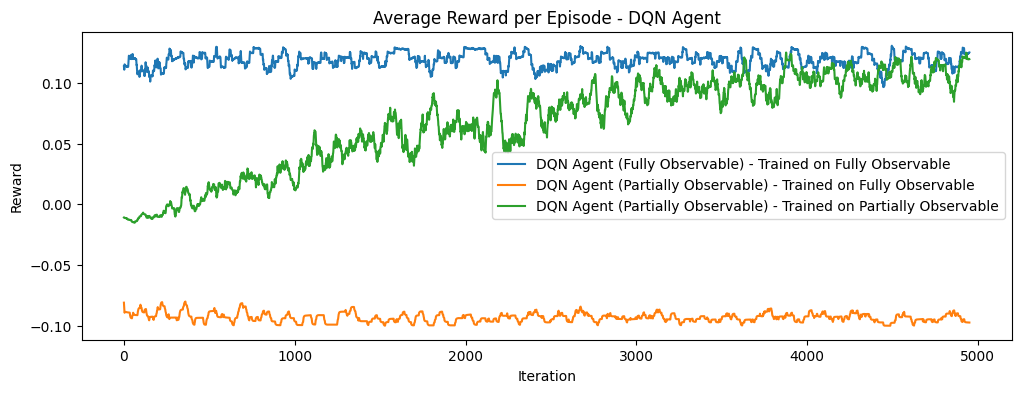

In [8]:
window = 50

def moving_average(data, window):
    return np.convolve(data, np.ones(window)/window, mode='valid')

plt.figure(figsize=(12, 4))

plt.plot(moving_average(rewards_history_loaded, window), label='DQN Agent (Fully Observable) - Trained on Fully Observable')
plt.plot(moving_average(rewards_history_loaded_po, window), label='DQN Agent (Partially Observable) - Trained on Fully Observable')
plt.plot(moving_average(rewards_history_dqn_po, window), label='DQN Agent (Partially Observable) - Trained on Partially Observable')
plt.title('Average Reward per Episode - DQN Agent')
plt.xlabel('Iteration')
plt.ylabel('Reward')
plt.legend()
plt.savefig("plots/rewards_dqn.png", bbox_inches='tight')
plt.show()
plt.close()

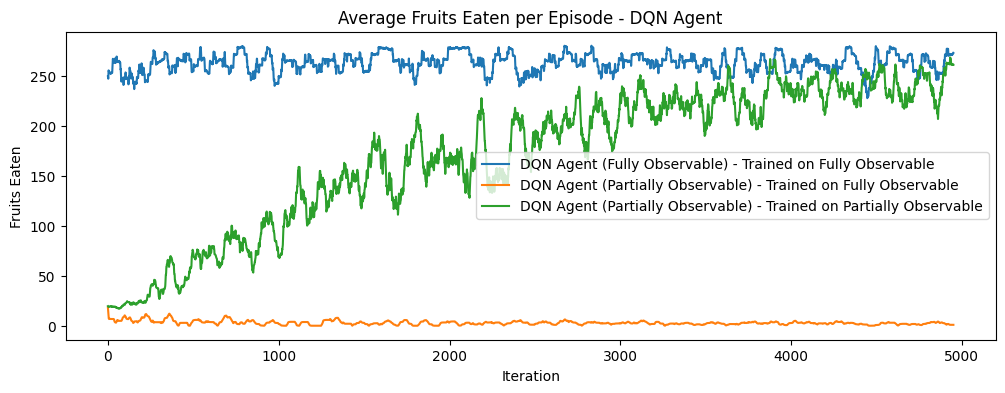

In [9]:
plt.figure(figsize=(12, 4))
plt.plot(moving_average(fruits_eaten_loaded, window), label='DQN Agent (Fully Observable) - Trained on Fully Observable')
plt.plot(moving_average(fruits_eaten_loaded_po, window), label='DQN Agent (Partially Observable) - Trained on Fully Observable')
plt.plot(moving_average(fruits_eaten_dqn_po, window), label='DQN Agent (Partially Observable) - Trained on Partially Observable')
plt.title('Average Fruits Eaten per Episode - DQN Agent')
plt.xlabel('Iteration')
plt.ylabel('Fruits Eaten')
plt.legend()
plt.savefig("plots/fruits_eaten_dqn.png", bbox_inches='tight')
plt.show()
plt.close()

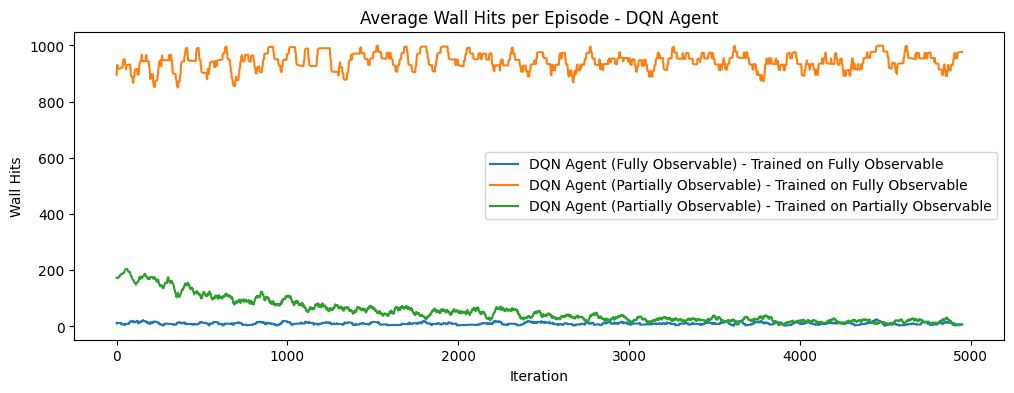

In [10]:
plt.figure(figsize=(12, 4))
plt.plot(moving_average(wall_hits_loaded, window), label='DQN Agent (Fully Observable) - Trained on Fully Observable')
plt.plot(moving_average(wall_hits_loaded_po, window), label='DQN Agent (Partially Observable) - Trained on Fully Observable')
plt.plot(moving_average(wall_hits_dqn_po, window), label='DQN Agent (Partially Observable) - Trained on Partially Observable')
plt.title('Average Wall Hits per Episode - DQN Agent')
plt.xlabel('Iteration')
plt.ylabel('Wall Hits')
plt.legend()
plt.savefig("plots/wall_hits_dqn.png", bbox_inches='tight')
plt.show()
plt.close()

## A2C Agent

### Training

In [11]:
from a2c import A2CAgent

env_ = get_env()
agent = A2CAgent(state_shape=env_.to_state().shape[1:], n_actions=4, gamma=GAMMA, learning_rate=5e-5, entropy_beta=0.0001)

rewards_history_ac, wall_hits_ac, fruits_eaten_ac, loss_history_ac = training(ITERATIONS, env_, agent, save_weights=True, save_path="weights/", file_name="snake_a2c_weights.h5")

  0%|          | 4/5000 [00:00<09:00,  9.25it/s]

Iteration 0: Avg Reward: -0.01, Avg Loss: 0.0094
Fruits eaten: 25, Max fruits eaten: 25
Wall hits: 197


  2%|▏         | 106/5000 [00:04<02:46, 29.39it/s]

Iteration 100: Avg Reward: -0.01, Avg Loss: 0.0067
Fruits eaten: 17, Max fruits eaten: 25
Wall hits: 197


  4%|▍         | 205/5000 [00:07<02:34, 31.08it/s]

Iteration 200: Avg Reward: -0.01, Avg Loss: 0.0024
Fruits eaten: 19, Max fruits eaten: 25
Wall hits: 189


  6%|▌         | 304/5000 [00:11<02:49, 27.73it/s]

Iteration 300: Avg Reward: -0.01, Avg Loss: -0.0011
Fruits eaten: 14, Max fruits eaten: 25
Wall hits: 172


  8%|▊         | 407/5000 [00:14<02:32, 30.20it/s]

Iteration 400: Avg Reward: -0.01, Avg Loss: -0.0069
Fruits eaten: 17, Max fruits eaten: 25
Wall hits: 180


 10%|█         | 504/5000 [00:18<02:32, 29.41it/s]

Iteration 500: Avg Reward: -0.01, Avg Loss: -0.0152
Fruits eaten: 22, Max fruits eaten: 25
Wall hits: 159


 12%|█▏        | 604/5000 [00:21<02:45, 26.63it/s]

Iteration 600: Avg Reward: -0.01, Avg Loss: -0.0235
Fruits eaten: 14, Max fruits eaten: 25
Wall hits: 151


 14%|█▍        | 706/5000 [00:25<02:40, 26.68it/s]

Iteration 700: Avg Reward: -0.00, Avg Loss: -0.0337
Fruits eaten: 18, Max fruits eaten: 25
Wall hits: 91


 16%|█▌        | 805/5000 [00:28<02:39, 26.31it/s]

Iteration 800: Avg Reward: -0.00, Avg Loss: -0.0379
Fruits eaten: 29, Max fruits eaten: 29
Wall hits: 104


 18%|█▊        | 905/5000 [00:31<02:19, 29.40it/s]

Iteration 900: Avg Reward: 0.00, Avg Loss: -0.0371
Fruits eaten: 29, Max fruits eaten: 29
Wall hits: 25


 20%|██        | 1006/5000 [00:35<02:36, 25.59it/s]

Iteration 1000: Avg Reward: 0.00, Avg Loss: -0.0349
Fruits eaten: 25, Max fruits eaten: 29
Wall hits: 19


 22%|██▏       | 1107/5000 [00:39<02:12, 29.28it/s]

Iteration 1100: Avg Reward: 0.01, Avg Loss: -0.0371
Fruits eaten: 36, Max fruits eaten: 36
Wall hits: 21


 24%|██▍       | 1205/5000 [00:42<02:08, 29.62it/s]

Iteration 1200: Avg Reward: 0.01, Avg Loss: -0.0417
Fruits eaten: 34, Max fruits eaten: 36
Wall hits: 11


 26%|██▌       | 1303/5000 [00:46<02:22, 25.92it/s]

Iteration 1300: Avg Reward: 0.01, Avg Loss: -0.0497
Fruits eaten: 36, Max fruits eaten: 36
Wall hits: 6


 28%|██▊       | 1406/5000 [00:50<02:26, 24.57it/s]

Iteration 1400: Avg Reward: 0.02, Avg Loss: -0.0510
Fruits eaten: 78, Max fruits eaten: 78
Wall hits: 10


 30%|███       | 1503/5000 [00:53<02:28, 23.54it/s]

Iteration 1500: Avg Reward: 0.02, Avg Loss: -0.0404
Fruits eaten: 56, Max fruits eaten: 78
Wall hits: 29


 32%|███▏      | 1603/5000 [00:57<02:10, 26.10it/s]

Iteration 1600: Avg Reward: 0.02, Avg Loss: -0.0451
Fruits eaten: 60, Max fruits eaten: 78
Wall hits: 29


 34%|███▍      | 1705/5000 [01:01<02:02, 27.00it/s]

Iteration 1700: Avg Reward: 0.02, Avg Loss: -0.0468
Fruits eaten: 50, Max fruits eaten: 78
Wall hits: 19


 36%|███▌      | 1804/5000 [01:06<02:09, 24.70it/s]

Iteration 1800: Avg Reward: 0.03, Avg Loss: -0.0411
Fruits eaten: 65, Max fruits eaten: 78
Wall hits: 29


 38%|███▊      | 1903/5000 [01:10<02:13, 23.12it/s]

Iteration 1900: Avg Reward: 0.03, Avg Loss: -0.0472
Fruits eaten: 65, Max fruits eaten: 78
Wall hits: 38


 40%|████      | 2005/5000 [01:14<02:09, 23.18it/s]

Iteration 2000: Avg Reward: 0.02, Avg Loss: -0.0466
Fruits eaten: 57, Max fruits eaten: 78
Wall hits: 26


 42%|████▏     | 2104/5000 [01:18<02:04, 23.17it/s]

Iteration 2100: Avg Reward: 0.02, Avg Loss: -0.0468
Fruits eaten: 59, Max fruits eaten: 78
Wall hits: 31


 44%|████▍     | 2203/5000 [01:22<01:50, 25.21it/s]

Iteration 2200: Avg Reward: 0.02, Avg Loss: -0.0441
Fruits eaten: 83, Max fruits eaten: 83
Wall hits: 20


 46%|████▌     | 2305/5000 [01:27<01:56, 23.17it/s]

Iteration 2300: Avg Reward: 0.03, Avg Loss: -0.0398
Fruits eaten: 77, Max fruits eaten: 83
Wall hits: 12


 48%|████▊     | 2404/5000 [01:31<01:42, 25.28it/s]

Iteration 2400: Avg Reward: 0.04, Avg Loss: -0.0381
Fruits eaten: 87, Max fruits eaten: 87
Wall hits: 9


 50%|█████     | 2503/5000 [01:35<01:53, 22.08it/s]

Iteration 2500: Avg Reward: 0.04, Avg Loss: -0.0308
Fruits eaten: 92, Max fruits eaten: 92
Wall hits: 3


 52%|█████▏    | 2605/5000 [01:40<01:45, 22.76it/s]

Iteration 2600: Avg Reward: 0.04, Avg Loss: -0.0220
Fruits eaten: 95, Max fruits eaten: 95
Wall hits: 8


 54%|█████▍    | 2704/5000 [01:44<01:43, 22.28it/s]

Iteration 2700: Avg Reward: 0.04, Avg Loss: -0.0267
Fruits eaten: 98, Max fruits eaten: 98
Wall hits: 7


 56%|█████▌    | 2803/5000 [01:48<01:38, 22.25it/s]

Iteration 2800: Avg Reward: 0.04, Avg Loss: -0.0199
Fruits eaten: 95, Max fruits eaten: 98
Wall hits: 7


 58%|█████▊    | 2905/5000 [01:53<01:32, 22.57it/s]

Iteration 2900: Avg Reward: 0.04, Avg Loss: -0.0150
Fruits eaten: 96, Max fruits eaten: 98
Wall hits: 6


 60%|██████    | 3004/5000 [01:57<01:30, 21.95it/s]

Iteration 3000: Avg Reward: 0.04, Avg Loss: -0.0142
Fruits eaten: 111, Max fruits eaten: 111
Wall hits: 6


 62%|██████▏   | 3103/5000 [02:02<01:23, 22.65it/s]

Iteration 3100: Avg Reward: 0.05, Avg Loss: -0.0146
Fruits eaten: 116, Max fruits eaten: 116
Wall hits: 3


 64%|██████▍   | 3205/5000 [02:06<01:19, 22.48it/s]

Iteration 3200: Avg Reward: 0.05, Avg Loss: -0.0080
Fruits eaten: 108, Max fruits eaten: 116
Wall hits: 2


 66%|██████▌   | 3304/5000 [02:11<01:17, 22.00it/s]

Iteration 3300: Avg Reward: 0.05, Avg Loss: -0.0089
Fruits eaten: 117, Max fruits eaten: 117
Wall hits: 4


 68%|██████▊   | 3403/5000 [02:15<01:10, 22.60it/s]

Iteration 3400: Avg Reward: 0.05, Avg Loss: -0.0077
Fruits eaten: 116, Max fruits eaten: 117
Wall hits: 3


 70%|███████   | 3505/5000 [02:20<01:07, 22.05it/s]

Iteration 3500: Avg Reward: 0.05, Avg Loss: -0.0070
Fruits eaten: 115, Max fruits eaten: 117
Wall hits: 6


 72%|███████▏  | 3604/5000 [02:24<01:02, 22.33it/s]

Iteration 3600: Avg Reward: 0.05, Avg Loss: -0.0038
Fruits eaten: 119, Max fruits eaten: 119
Wall hits: 0


 74%|███████▍  | 3703/5000 [02:29<00:58, 22.10it/s]

Iteration 3700: Avg Reward: 0.05, Avg Loss: -0.0026
Fruits eaten: 113, Max fruits eaten: 119
Wall hits: 0


 76%|███████▌  | 3805/5000 [02:33<00:53, 22.14it/s]

Iteration 3800: Avg Reward: 0.05, Avg Loss: -0.0006
Fruits eaten: 120, Max fruits eaten: 120
Wall hits: 1


 78%|███████▊  | 3904/5000 [02:38<00:50, 21.87it/s]

Iteration 3900: Avg Reward: 0.05, Avg Loss: 0.0029
Fruits eaten: 114, Max fruits eaten: 120
Wall hits: 5


 80%|████████  | 4003/5000 [02:42<00:44, 22.56it/s]

Iteration 4000: Avg Reward: 0.05, Avg Loss: -0.0019
Fruits eaten: 108, Max fruits eaten: 120
Wall hits: 2


 82%|████████▏ | 4105/5000 [02:47<00:41, 21.51it/s]

Iteration 4100: Avg Reward: 0.05, Avg Loss: 0.0024
Fruits eaten: 110, Max fruits eaten: 120
Wall hits: 0


 84%|████████▍ | 4204/5000 [02:51<00:36, 22.10it/s]

Iteration 4200: Avg Reward: 0.05, Avg Loss: 0.0062
Fruits eaten: 123, Max fruits eaten: 123
Wall hits: 2


 86%|████████▌ | 4303/5000 [02:56<00:32, 21.72it/s]

Iteration 4300: Avg Reward: 0.06, Avg Loss: 0.0073
Fruits eaten: 124, Max fruits eaten: 124
Wall hits: 1


 88%|████████▊ | 4405/5000 [03:00<00:26, 22.28it/s]

Iteration 4400: Avg Reward: 0.06, Avg Loss: 0.0110
Fruits eaten: 119, Max fruits eaten: 124
Wall hits: 1


 90%|█████████ | 4504/5000 [03:05<00:22, 22.13it/s]

Iteration 4500: Avg Reward: 0.06, Avg Loss: 0.0095
Fruits eaten: 119, Max fruits eaten: 124
Wall hits: 2


 92%|█████████▏| 4603/5000 [03:10<00:18, 21.36it/s]

Iteration 4600: Avg Reward: 0.06, Avg Loss: 0.0092
Fruits eaten: 131, Max fruits eaten: 131
Wall hits: 2


 94%|█████████▍| 4705/5000 [03:14<00:13, 21.81it/s]

Iteration 4700: Avg Reward: 0.06, Avg Loss: 0.0175
Fruits eaten: 158, Max fruits eaten: 158
Wall hits: 1


 96%|█████████▌| 4804/5000 [03:19<00:09, 21.56it/s]

Iteration 4800: Avg Reward: 0.06, Avg Loss: 0.0149
Fruits eaten: 146, Max fruits eaten: 158
Wall hits: 1


 98%|█████████▊| 4903/5000 [03:24<00:04, 21.75it/s]

Iteration 4900: Avg Reward: 0.06, Avg Loss: 0.0196
Fruits eaten: 117, Max fruits eaten: 158
Wall hits: 2


100%|██████████| 5000/5000 [03:28<00:00, 23.98it/s]

Model weights saved to weights/snake_a2c_weights.h5
Weights saved to weights/snake_a2c_weights.h5


### Load the weights - A2C Agent

In [12]:
env = get_env()
agent = A2CAgent(state_shape=env.to_state().shape[1:], n_actions=4, gamma=GAMMA, learning_rate=5e-5, entropy_beta=0.0001)
agent.load_weights("weights/snake_a2c_weights.h5")

rewards_history_loaded_ac = []
wall_hits_loaded_ac = []
fruits_eaten_loaded_ac = []

for iteration in trange(ITERATIONS):
    state = tf.constant(env.to_state())
    actions = agent.select_action(state)
    rewards = env.move(actions)
    wall_hits_count = np.sum(rewards == env.HIT_WALL_REWARD)
    wall_hits_loaded_ac.append(wall_hits_count)
    fruits_eaten_count = np.sum(rewards == env.FRUIT_REWARD)
    fruits_eaten_loaded_ac.append(fruits_eaten_count)
    rewards_history_loaded_ac.append(np.mean(rewards))
    dones = np.isin(rewards.numpy().flatten(), [env.WIN_REWARD, env.HIT_WALL_REWARD, env.ATE_HIMSELF_REWARD])

print(f"Avg Reward: {np.mean(rewards_history_loaded_ac):.2f}")
print(f"Avg Wall Hits: {np.mean(wall_hits_loaded_ac):.2f}")
print(f"Avg Fruits Eaten: {np.mean(fruits_eaten_loaded_ac):.2f}")

Model weights loaded from weights/snake_a2c_weights.h5


100%|██████████| 5000/5000 [02:20<00:00, 35.58it/s]

Avg Reward: 0.06
Avg Wall Hits: 0.56
Avg Fruits Eaten: 138.21


### Load the weights - Testing on Partially Observable Environment

In [13]:
env = get_env(partially_observable=True)
agent = A2CAgent(state_shape=env.to_state().shape[1:], n_actions=4, gamma=GAMMA, learning_rate=5e-5, entropy_beta=0.0001)
agent.load_weights("weights/snake_a2c_weights.h5")

rewards_history_loaded_ac_po = []
wall_hits_loaded_ac_po = []
fruits_eaten_loaded_ac_po = []
loss_history_loaded_ac_po = []

for iteration in trange(ITERATIONS):
    state = tf.constant(env.to_state())
    actions = agent.select_action(state)
    rewards = env.move(actions)
    wall_hits_count = np.sum(rewards == env.HIT_WALL_REWARD)
    wall_hits_loaded_ac_po.append(wall_hits_count)
    fruits_eaten_count = np.sum(rewards == env.FRUIT_REWARD)
    fruits_eaten_loaded_ac_po.append(fruits_eaten_count)
    rewards_history_loaded_ac_po.append(np.mean(rewards))
    dones = np.isin(rewards.numpy().flatten(), [env.WIN_REWARD, env.HIT_WALL_REWARD, env.ATE_HIMSELF_REWARD])

print(f"Avg Reward: {np.mean(rewards_history_loaded_ac_po):.2f}")
print(f"Avg Wall Hits: {np.mean(wall_hits_loaded_ac_po):.2f}")
print(f"Avg Fruits Eaten: {np.mean(fruits_eaten_loaded_ac_po):.2f}")

Model weights loaded from weights/snake_a2c_weights.h5


100%|██████████| 5000/5000 [01:42<00:00, 48.97it/s]

Avg Reward: -0.09
Avg Wall Hits: 923.69
Avg Fruits Eaten: 1.17


Here we train the model on the partially observable environment

In [14]:
env = get_env(partially_observable=True)
agent = A2CAgent(state_shape=env.to_state().shape[1:], n_actions=4, gamma=GAMMA, learning_rate=5e-5, entropy_beta=0.0001)

rewards_history_a2c_po, wall_hits_a2c_po, fruits_eaten_a2c_po, loss_history_a2c_po = training(ITERATIONS, env, agent, save_weights=True, save_path="weights/", file_name="snake_a2c_weights_po.h5")

  0%|          | 0/5000 [00:00<?, ?it/s]

Iteration 0: Avg Reward: -0.01, Avg Loss: 0.0122
Fruits eaten: 33, Max fruits eaten: 33
Wall hits: 224


  2%|▏         | 104/5000 [00:04<03:42, 22.05it/s]

Iteration 100: Avg Reward: -0.01, Avg Loss: -0.0054
Fruits eaten: 16, Max fruits eaten: 33
Wall hits: 110


  4%|▍         | 203/5000 [00:09<03:39, 21.84it/s]

Iteration 200: Avg Reward: -0.00, Avg Loss: -0.0264
Fruits eaten: 22, Max fruits eaten: 33
Wall hits: 31


  6%|▌         | 305/5000 [00:13<03:34, 21.93it/s]

Iteration 300: Avg Reward: 0.00, Avg Loss: -0.0465
Fruits eaten: 19, Max fruits eaten: 33
Wall hits: 24


  8%|▊         | 404/5000 [00:18<03:28, 22.08it/s]

Iteration 400: Avg Reward: 0.01, Avg Loss: -0.0714
Fruits eaten: 27, Max fruits eaten: 33
Wall hits: 21


 10%|█         | 503/5000 [00:23<03:32, 21.14it/s]

Iteration 500: Avg Reward: 0.01, Avg Loss: -0.0904
Fruits eaten: 33, Max fruits eaten: 33
Wall hits: 18


 12%|█▏        | 605/5000 [00:27<03:34, 20.51it/s]

Iteration 600: Avg Reward: 0.02, Avg Loss: -0.0869
Fruits eaten: 51, Max fruits eaten: 51
Wall hits: 21


 14%|█▍        | 704/5000 [00:32<03:36, 19.82it/s]

Iteration 700: Avg Reward: 0.02, Avg Loss: -0.0692
Fruits eaten: 46, Max fruits eaten: 51
Wall hits: 21


 16%|█▌        | 804/5000 [00:37<03:32, 19.72it/s]

Iteration 800: Avg Reward: 0.02, Avg Loss: -0.0522
Fruits eaten: 50, Max fruits eaten: 51
Wall hits: 13


 18%|█▊        | 903/5000 [00:42<03:27, 19.75it/s]

Iteration 900: Avg Reward: 0.02, Avg Loss: -0.0402
Fruits eaten: 53, Max fruits eaten: 53
Wall hits: 16


 20%|██        | 1005/5000 [00:48<03:22, 19.74it/s]

Iteration 1000: Avg Reward: 0.02, Avg Loss: -0.0300
Fruits eaten: 51, Max fruits eaten: 53
Wall hits: 27


 22%|██▏       | 1105/5000 [00:53<03:14, 20.05it/s]

Iteration 1100: Avg Reward: 0.02, Avg Loss: -0.0221
Fruits eaten: 35, Max fruits eaten: 53
Wall hits: 33


 24%|██▍       | 1204/5000 [00:58<03:14, 19.52it/s]

Iteration 1200: Avg Reward: 0.02, Avg Loss: -0.0233
Fruits eaten: 62, Max fruits eaten: 62
Wall hits: 31


 26%|██▌       | 1305/5000 [01:03<03:10, 19.35it/s]

Iteration 1300: Avg Reward: 0.02, Avg Loss: -0.0148
Fruits eaten: 53, Max fruits eaten: 62
Wall hits: 26


 28%|██▊       | 1405/5000 [01:08<03:03, 19.60it/s]

Iteration 1400: Avg Reward: 0.02, Avg Loss: -0.0141
Fruits eaten: 53, Max fruits eaten: 62
Wall hits: 41


 30%|███       | 1504/5000 [01:13<03:00, 19.36it/s]

Iteration 1500: Avg Reward: 0.03, Avg Loss: -0.0095
Fruits eaten: 72, Max fruits eaten: 72
Wall hits: 47


 32%|███▏      | 1604/5000 [01:18<02:55, 19.33it/s]

Iteration 1600: Avg Reward: 0.02, Avg Loss: -0.0057
Fruits eaten: 50, Max fruits eaten: 72
Wall hits: 68


 34%|███▍      | 1704/5000 [01:24<02:52, 19.08it/s]

Iteration 1700: Avg Reward: 0.02, Avg Loss: -0.0040
Fruits eaten: 46, Max fruits eaten: 72
Wall hits: 46


 36%|███▌      | 1805/5000 [01:29<02:38, 20.18it/s]

Iteration 1800: Avg Reward: 0.02, Avg Loss: -0.0024
Fruits eaten: 35, Max fruits eaten: 72
Wall hits: 60


 38%|███▊      | 1903/5000 [01:34<02:40, 19.30it/s]

Iteration 1900: Avg Reward: 0.02, Avg Loss: -0.0023
Fruits eaten: 61, Max fruits eaten: 72
Wall hits: 44


 40%|████      | 2003/5000 [01:39<02:44, 18.17it/s]

Iteration 2000: Avg Reward: 0.02, Avg Loss: 0.0014
Fruits eaten: 43, Max fruits eaten: 72
Wall hits: 48


 42%|████▏     | 2104/5000 [01:44<02:31, 19.16it/s]

Iteration 2100: Avg Reward: 0.02, Avg Loss: -0.0017
Fruits eaten: 70, Max fruits eaten: 72
Wall hits: 52


 44%|████▍     | 2203/5000 [01:49<02:26, 19.08it/s]

Iteration 2200: Avg Reward: 0.02, Avg Loss: -0.0011
Fruits eaten: 40, Max fruits eaten: 72
Wall hits: 55


 46%|████▌     | 2304/5000 [01:55<02:18, 19.42it/s]

Iteration 2300: Avg Reward: 0.02, Avg Loss: 0.0064
Fruits eaten: 55, Max fruits eaten: 72
Wall hits: 58


 48%|████▊     | 2403/5000 [02:00<02:19, 18.67it/s]

Iteration 2400: Avg Reward: 0.02, Avg Loss: 0.0006
Fruits eaten: 63, Max fruits eaten: 72
Wall hits: 52


 50%|█████     | 2505/5000 [02:05<02:08, 19.46it/s]

Iteration 2500: Avg Reward: 0.02, Avg Loss: 0.0033
Fruits eaten: 57, Max fruits eaten: 72
Wall hits: 68


 52%|█████▏    | 2604/5000 [02:10<02:00, 19.82it/s]

Iteration 2600: Avg Reward: 0.01, Avg Loss: -0.0009
Fruits eaten: 34, Max fruits eaten: 72
Wall hits: 59


 54%|█████▍    | 2704/5000 [02:15<01:59, 19.27it/s]

Iteration 2700: Avg Reward: 0.02, Avg Loss: 0.0034
Fruits eaten: 54, Max fruits eaten: 72
Wall hits: 70


 56%|█████▌    | 2803/5000 [02:20<01:52, 19.61it/s]

Iteration 2800: Avg Reward: 0.02, Avg Loss: 0.0094
Fruits eaten: 36, Max fruits eaten: 72
Wall hits: 76


 58%|█████▊    | 2903/5000 [02:26<01:47, 19.55it/s]

Iteration 2900: Avg Reward: 0.02, Avg Loss: 0.0059
Fruits eaten: 66, Max fruits eaten: 72
Wall hits: 73


 60%|██████    | 3003/5000 [02:31<01:45, 18.89it/s]

Iteration 3000: Avg Reward: 0.02, Avg Loss: 0.0101
Fruits eaten: 72, Max fruits eaten: 72
Wall hits: 85


 62%|██████▏   | 3103/5000 [02:36<01:36, 19.71it/s]

Iteration 3100: Avg Reward: 0.02, Avg Loss: 0.0076
Fruits eaten: 52, Max fruits eaten: 72
Wall hits: 64


 64%|██████▍   | 3204/5000 [02:41<01:31, 19.63it/s]

Iteration 3200: Avg Reward: 0.01, Avg Loss: 0.0043
Fruits eaten: 29, Max fruits eaten: 72
Wall hits: 59


 66%|██████▌   | 3304/5000 [02:46<01:27, 19.44it/s]

Iteration 3300: Avg Reward: 0.01, Avg Loss: 0.0076
Fruits eaten: 49, Max fruits eaten: 72
Wall hits: 46


 68%|██████▊   | 3404/5000 [02:51<01:24, 18.99it/s]

Iteration 3400: Avg Reward: 0.02, Avg Loss: 0.0068
Fruits eaten: 58, Max fruits eaten: 72
Wall hits: 73


 70%|███████   | 3504/5000 [02:57<01:18, 19.00it/s]

Iteration 3500: Avg Reward: 0.03, Avg Loss: 0.0134
Fruits eaten: 69, Max fruits eaten: 72
Wall hits: 82


 72%|███████▏  | 3604/5000 [03:02<01:15, 18.56it/s]

Iteration 3600: Avg Reward: 0.02, Avg Loss: 0.0154
Fruits eaten: 85, Max fruits eaten: 85
Wall hits: 91


 74%|███████▍  | 3703/5000 [03:07<01:07, 19.08it/s]

Iteration 3700: Avg Reward: 0.02, Avg Loss: 0.0050
Fruits eaten: 40, Max fruits eaten: 85
Wall hits: 66


 76%|███████▌  | 3803/5000 [03:12<01:00, 19.71it/s]

Iteration 3800: Avg Reward: 0.01, Avg Loss: 0.0066
Fruits eaten: 55, Max fruits eaten: 85
Wall hits: 49


 78%|███████▊  | 3905/5000 [03:18<00:55, 19.88it/s]

Iteration 3900: Avg Reward: 0.01, Avg Loss: 0.0117
Fruits eaten: 40, Max fruits eaten: 85
Wall hits: 45


 80%|████████  | 4003/5000 [03:22<00:50, 19.62it/s]

Iteration 4000: Avg Reward: 0.01, Avg Loss: 0.0092
Fruits eaten: 33, Max fruits eaten: 85
Wall hits: 57


 82%|████████▏ | 4104/5000 [03:28<00:44, 20.11it/s]

Iteration 4100: Avg Reward: 0.01, Avg Loss: 0.0088
Fruits eaten: 44, Max fruits eaten: 85
Wall hits: 46


 84%|████████▍ | 4203/5000 [03:33<00:39, 20.01it/s]

Iteration 4200: Avg Reward: 0.01, Avg Loss: 0.0045
Fruits eaten: 39, Max fruits eaten: 85
Wall hits: 53


 86%|████████▌ | 4305/5000 [03:38<00:33, 20.46it/s]

Iteration 4300: Avg Reward: 0.01, Avg Loss: 0.0067
Fruits eaten: 32, Max fruits eaten: 85
Wall hits: 50


 88%|████████▊ | 4403/5000 [03:43<00:30, 19.44it/s]

Iteration 4400: Avg Reward: 0.01, Avg Loss: 0.0027
Fruits eaten: 31, Max fruits eaten: 85
Wall hits: 42


 90%|█████████ | 4504/5000 [03:48<00:24, 20.24it/s]

Iteration 4500: Avg Reward: 0.01, Avg Loss: 0.0031
Fruits eaten: 31, Max fruits eaten: 85
Wall hits: 34


 92%|█████████▏| 4603/5000 [03:52<00:19, 20.61it/s]

Iteration 4600: Avg Reward: 0.01, Avg Loss: 0.0056
Fruits eaten: 21, Max fruits eaten: 85
Wall hits: 34


 94%|█████████▍| 4702/5000 [03:57<00:15, 19.86it/s]

Iteration 4700: Avg Reward: 0.01, Avg Loss: 0.0032
Fruits eaten: 42, Max fruits eaten: 85
Wall hits: 48


 96%|█████████▌| 4803/5000 [04:03<00:10, 19.51it/s]

Iteration 4800: Avg Reward: 0.02, Avg Loss: 0.0063
Fruits eaten: 33, Max fruits eaten: 85
Wall hits: 76


 98%|█████████▊| 4904/5000 [04:08<00:05, 18.71it/s]

Iteration 4900: Avg Reward: 0.02, Avg Loss: 0.0163
Fruits eaten: 53, Max fruits eaten: 85
Wall hits: 57


100%|██████████| 5000/5000 [04:13<00:00, 19.74it/s]

Model weights saved to weights/snake_a2c_weights_po.h5
Weights saved to weights/snake_a2c_weights_po.h5


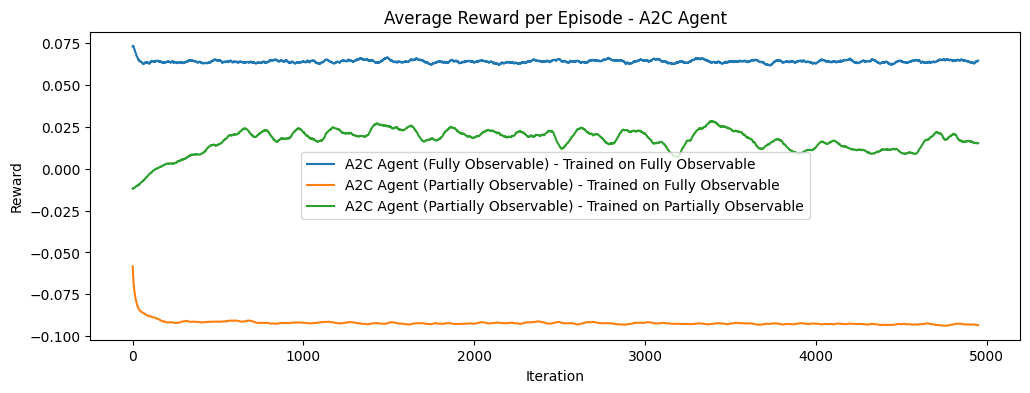

In [15]:
plt.figure(figsize=(12, 4))

plt.plot(moving_average(rewards_history_loaded_ac, window), label='A2C Agent (Fully Observable) - Trained on Fully Observable')
plt.plot(moving_average(rewards_history_loaded_ac_po, window), label='A2C Agent (Partially Observable) - Trained on Fully Observable')
plt.plot(moving_average(rewards_history_a2c_po, window), label='A2C Agent (Partially Observable) - Trained on Partially Observable')
plt.title('Average Reward per Episode - A2C Agent')
plt.xlabel('Iteration')
plt.ylabel('Reward')
plt.legend()
plt.savefig("plots/rewards_a2c.png", bbox_inches='tight')
plt.show()
plt.close()

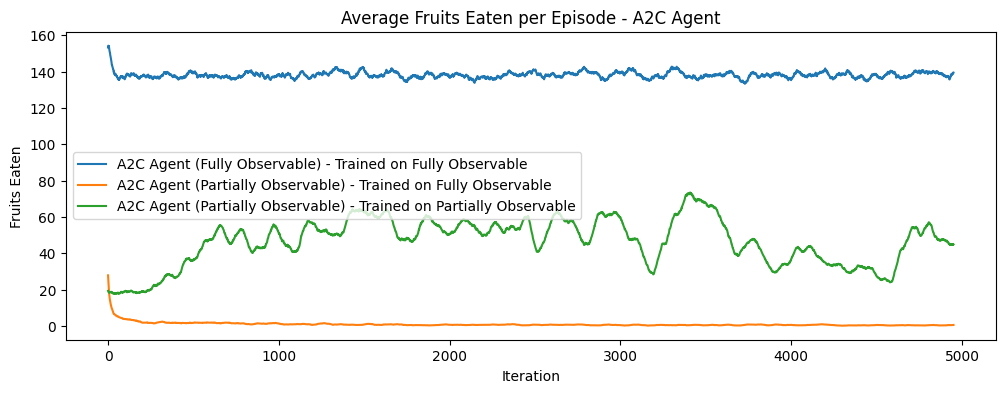

In [16]:
plt.figure(figsize=(12, 4))
plt.plot(moving_average(fruits_eaten_loaded_ac, window), label='A2C Agent (Fully Observable) - Trained on Fully Observable')
plt.plot(moving_average(fruits_eaten_loaded_ac_po, window), label='A2C Agent (Partially Observable) - Trained on Fully Observable')
plt.plot(moving_average(fruits_eaten_a2c_po, window), label='A2C Agent (Partially Observable) - Trained on Partially Observable')
plt.title('Average Fruits Eaten per Episode - A2C Agent')
plt.xlabel('Iteration')
plt.ylabel('Fruits Eaten')
plt.legend()
plt.savefig("plots/fruits_eaten_a2c.png", bbox_inches='tight')
plt.show()
plt.close()

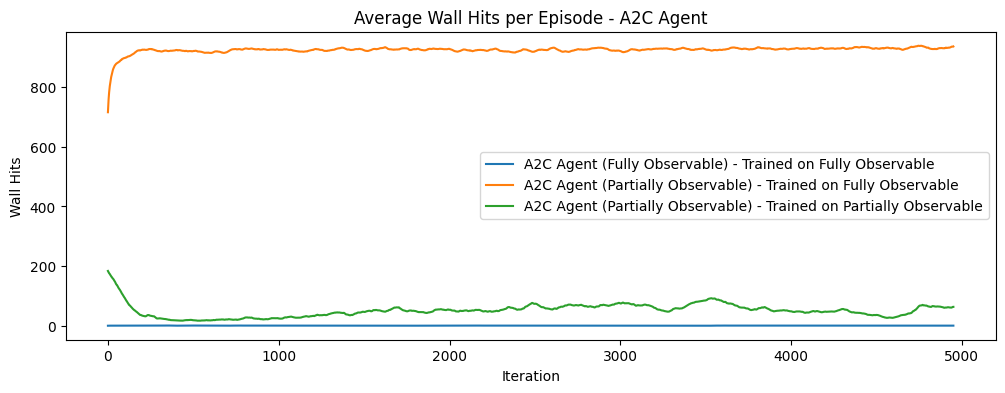

In [17]:
plt.figure(figsize=(12, 4))
plt.plot(moving_average(wall_hits_loaded_ac, window), label='A2C Agent (Fully Observable) - Trained on Fully Observable')
plt.plot(moving_average(wall_hits_loaded_ac_po, window), label='A2C Agent (Partially Observable) - Trained on Fully Observable')
plt.plot(moving_average(wall_hits_a2c_po, window), label='A2C Agent (Partially Observable) - Trained on Partially Observable')
plt.title('Average Wall Hits per Episode - A2C Agent')
plt.xlabel('Iteration')
plt.ylabel('Wall Hits')
plt.legend()
plt.savefig("plots/wall_hits_a2c.png", bbox_inches='tight')
plt.show()
plt.close()

## Double DQN

### Training

In [18]:
from ddqn import DoubleDQNAgent

env_ = get_env()
agent = DoubleDQNAgent(state_shape=env_.to_state().shape[1:], n_actions=4, buffer_size=10000, batch_size=128, epsilon_start=1., epsilon_end=0.1, epsilon_decay=0.9995, learning_rate=1e-4, gamma=GAMMA, target_update_freq=100)

rewards_history_ddqn, wall_hits_ddqn, fruits_eaten_ddqn, loss_history_ddqn = training(ITERATIONS, env_, agent, save_weights=True, save_path="weights/", file_name="snake_ddqn_weights.h5")

  0%|          | 1/5000 [00:01<1:56:59,  1.40s/it]

Iteration 0: Avg Reward: -0.01, Avg Loss: 0.0096
Fruits eaten: 28, Max fruits eaten: 28
Wall hits: 207


  2%|▏         | 101/5000 [01:39<1:19:07,  1.03it/s]

Iteration 100: Avg Reward: -0.01, Avg Loss: 0.0070
Fruits eaten: 13, Max fruits eaten: 28
Wall hits: 186


  4%|▍         | 201/5000 [03:18<1:23:21,  1.04s/it]

Iteration 200: Avg Reward: -0.01, Avg Loss: 0.0055
Fruits eaten: 26, Max fruits eaten: 28
Wall hits: 5


  6%|▌         | 301/5000 [05:01<1:20:29,  1.03s/it]

Iteration 300: Avg Reward: -0.01, Avg Loss: 0.0062
Fruits eaten: 14, Max fruits eaten: 28
Wall hits: 173


  8%|▊         | 401/5000 [06:44<1:18:54,  1.03s/it]

Iteration 400: Avg Reward: -0.01, Avg Loss: 0.0061
Fruits eaten: 12, Max fruits eaten: 28
Wall hits: 189


 10%|█         | 501/5000 [08:27<1:16:43,  1.02s/it]

Iteration 500: Avg Reward: -0.01, Avg Loss: 0.0069
Fruits eaten: 18, Max fruits eaten: 28
Wall hits: 207


 12%|█▏        | 601/5000 [10:10<1:15:49,  1.03s/it]

Iteration 600: Avg Reward: -0.00, Avg Loss: 0.0090
Fruits eaten: 69, Max fruits eaten: 69
Wall hits: 0


 14%|█▍        | 701/5000 [11:53<1:14:23,  1.04s/it]

Iteration 700: Avg Reward: 0.00, Avg Loss: 0.0098
Fruits eaten: 21, Max fruits eaten: 69
Wall hits: 137


 16%|█▌        | 801/5000 [13:36<1:11:55,  1.03s/it]

Iteration 800: Avg Reward: 0.00, Avg Loss: 0.0082
Fruits eaten: 16, Max fruits eaten: 69
Wall hits: 151


 18%|█▊        | 901/5000 [15:19<1:10:29,  1.03s/it]

Iteration 900: Avg Reward: 0.01, Avg Loss: 0.0104
Fruits eaten: 16, Max fruits eaten: 69
Wall hits: 195


 20%|██        | 1001/5000 [17:03<1:08:55,  1.03s/it]

Iteration 1000: Avg Reward: 0.02, Avg Loss: 0.0117
Fruits eaten: 196, Max fruits eaten: 196
Wall hits: 1


 22%|██▏       | 1101/5000 [18:46<1:07:01,  1.03s/it]

Iteration 1100: Avg Reward: 0.01, Avg Loss: 0.0115
Fruits eaten: 235, Max fruits eaten: 235
Wall hits: 0


 24%|██▍       | 1201/5000 [20:29<1:05:42,  1.04s/it]

Iteration 1200: Avg Reward: 0.03, Avg Loss: 0.0132
Fruits eaten: 117, Max fruits eaten: 235
Wall hits: 1


 26%|██▌       | 1301/5000 [22:13<1:04:13,  1.04s/it]

Iteration 1300: Avg Reward: 0.03, Avg Loss: 0.0155
Fruits eaten: 21, Max fruits eaten: 235
Wall hits: 170


 28%|██▊       | 1401/5000 [23:57<1:02:14,  1.04s/it]

Iteration 1400: Avg Reward: 0.04, Avg Loss: 0.0191
Fruits eaten: 57, Max fruits eaten: 235
Wall hits: 138


 30%|███       | 1501/5000 [25:41<1:01:24,  1.05s/it]

Iteration 1500: Avg Reward: 0.05, Avg Loss: 0.0209
Fruits eaten: 307, Max fruits eaten: 307
Wall hits: 4


 32%|███▏      | 1601/5000 [27:25<1:00:16,  1.06s/it]

Iteration 1600: Avg Reward: 0.06, Avg Loss: 0.0224
Fruits eaten: 57, Max fruits eaten: 307
Wall hits: 137


 34%|███▍      | 1701/5000 [29:10<57:54,  1.05s/it]  

Iteration 1700: Avg Reward: 0.04, Avg Loss: 0.0300
Fruits eaten: 292, Max fruits eaten: 307
Wall hits: 3


 36%|███▌      | 1801/5000 [30:55<55:01,  1.03s/it]

Iteration 1800: Avg Reward: 0.05, Avg Loss: 0.0313
Fruits eaten: 73, Max fruits eaten: 307
Wall hits: 107


 38%|███▊      | 1901/5000 [32:39<53:26,  1.03s/it]

Iteration 1900: Avg Reward: 0.05, Avg Loss: 0.0315
Fruits eaten: 34, Max fruits eaten: 307
Wall hits: 173


 40%|████      | 2001/5000 [34:23<51:51,  1.04s/it]

Iteration 2000: Avg Reward: 0.06, Avg Loss: 0.0351
Fruits eaten: 133, Max fruits eaten: 307
Wall hits: 2


 42%|████▏     | 2101/5000 [36:07<50:29,  1.05s/it]

Iteration 2100: Avg Reward: 0.07, Avg Loss: 0.0361
Fruits eaten: 128, Max fruits eaten: 307
Wall hits: 6


 44%|████▍     | 2201/5000 [37:52<48:06,  1.03s/it]

Iteration 2200: Avg Reward: 0.07, Avg Loss: 0.0373
Fruits eaten: 35, Max fruits eaten: 307
Wall hits: 164


 46%|████▌     | 2301/5000 [39:36<46:49,  1.04s/it]

Iteration 2300: Avg Reward: 0.08, Avg Loss: 0.0325
Fruits eaten: 132, Max fruits eaten: 307
Wall hits: 3


 48%|████▊     | 2401/5000 [41:21<45:13,  1.04s/it]

Iteration 2400: Avg Reward: 0.07, Avg Loss: 0.0414
Fruits eaten: 140, Max fruits eaten: 307
Wall hits: 1


 50%|█████     | 2501/5000 [43:06<43:32,  1.05s/it]

Iteration 2500: Avg Reward: 0.07, Avg Loss: 0.0556
Fruits eaten: 271, Max fruits eaten: 307
Wall hits: 0


 52%|█████▏    | 2601/5000 [44:50<41:45,  1.04s/it]

Iteration 2600: Avg Reward: 0.07, Avg Loss: 0.0489
Fruits eaten: 261, Max fruits eaten: 307
Wall hits: 0


 54%|█████▍    | 2701/5000 [46:34<39:47,  1.04s/it]

Iteration 2700: Avg Reward: 0.07, Avg Loss: 0.0452
Fruits eaten: 151, Max fruits eaten: 307
Wall hits: 5


 56%|█████▌    | 2801/5000 [48:18<38:24,  1.05s/it]

Iteration 2800: Avg Reward: 0.07, Avg Loss: 0.0451
Fruits eaten: 266, Max fruits eaten: 307
Wall hits: 6


 58%|█████▊    | 2901/5000 [50:03<36:39,  1.05s/it]

Iteration 2900: Avg Reward: 0.09, Avg Loss: 0.0372
Fruits eaten: 284, Max fruits eaten: 307
Wall hits: 2


 60%|██████    | 3001/5000 [51:48<34:27,  1.03s/it]

Iteration 3000: Avg Reward: 0.09, Avg Loss: 0.0344
Fruits eaten: 72, Max fruits eaten: 307
Wall hits: 146


 62%|██████▏   | 3101/5000 [53:33<33:03,  1.04s/it]

Iteration 3100: Avg Reward: 0.07, Avg Loss: 0.0479
Fruits eaten: 147, Max fruits eaten: 307
Wall hits: 2


 64%|██████▍   | 3201/5000 [55:19<31:25,  1.05s/it]

Iteration 3200: Avg Reward: 0.08, Avg Loss: 0.0476
Fruits eaten: 310, Max fruits eaten: 310
Wall hits: 1


 66%|██████▌   | 3301/5000 [57:03<29:51,  1.05s/it]

Iteration 3300: Avg Reward: 0.09, Avg Loss: 0.0413
Fruits eaten: 278, Max fruits eaten: 310
Wall hits: 3


 68%|██████▊   | 3401/5000 [58:52<29:36,  1.11s/it]

Iteration 3400: Avg Reward: 0.09, Avg Loss: 0.0351
Fruits eaten: 73, Max fruits eaten: 310
Wall hits: 133


 70%|███████   | 3501/5000 [1:00:37<26:33,  1.06s/it]

Iteration 3500: Avg Reward: 0.10, Avg Loss: 0.0342
Fruits eaten: 131, Max fruits eaten: 310
Wall hits: 3


 72%|███████▏  | 3601/5000 [1:02:17<23:00,  1.01it/s]

Iteration 3600: Avg Reward: 0.10, Avg Loss: 0.0383
Fruits eaten: 30, Max fruits eaten: 310
Wall hits: 162


 74%|███████▍  | 3701/5000 [1:04:01<22:38,  1.05s/it]

Iteration 3700: Avg Reward: 0.11, Avg Loss: 0.0307
Fruits eaten: 77, Max fruits eaten: 310
Wall hits: 140


 76%|███████▌  | 3801/5000 [1:05:47<20:55,  1.05s/it]

Iteration 3800: Avg Reward: 0.10, Avg Loss: 0.0336
Fruits eaten: 131, Max fruits eaten: 310
Wall hits: 0


 78%|███████▊  | 3901/5000 [1:07:32<19:08,  1.04s/it]

Iteration 3900: Avg Reward: 0.10, Avg Loss: 0.0352
Fruits eaten: 283, Max fruits eaten: 310
Wall hits: 5


 80%|████████  | 4001/5000 [1:09:18<17:22,  1.04s/it]

Iteration 4000: Avg Reward: 0.10, Avg Loss: 0.0357
Fruits eaten: 267, Max fruits eaten: 310
Wall hits: 3


 82%|████████▏ | 4101/5000 [1:11:02<15:36,  1.04s/it]

Iteration 4100: Avg Reward: 0.10, Avg Loss: 0.0334
Fruits eaten: 262, Max fruits eaten: 310
Wall hits: 4


 84%|████████▍ | 4201/5000 [1:12:42<13:17,  1.00it/s]

Iteration 4200: Avg Reward: 0.10, Avg Loss: 0.0347
Fruits eaten: 280, Max fruits eaten: 310
Wall hits: 3


 86%|████████▌ | 4301/5000 [1:14:22<11:32,  1.01it/s]

Iteration 4300: Avg Reward: 0.10, Avg Loss: 0.0383
Fruits eaten: 282, Max fruits eaten: 310
Wall hits: 5


 88%|████████▊ | 4401/5000 [1:16:05<10:19,  1.03s/it]

Iteration 4400: Avg Reward: 0.11, Avg Loss: 0.0408
Fruits eaten: 150, Max fruits eaten: 310
Wall hits: 1


 90%|█████████ | 4501/5000 [1:17:50<08:42,  1.05s/it]

Iteration 4500: Avg Reward: 0.11, Avg Loss: 0.0404
Fruits eaten: 136, Max fruits eaten: 310
Wall hits: 2


 92%|█████████▏| 4601/5000 [1:19:35<06:55,  1.04s/it]

Iteration 4600: Avg Reward: 0.10, Avg Loss: 0.0483
Fruits eaten: 281, Max fruits eaten: 310
Wall hits: 7


 94%|█████████▍| 4701/5000 [1:21:15<04:59,  1.00s/it]

Iteration 4700: Avg Reward: 0.11, Avg Loss: 0.0414
Fruits eaten: 289, Max fruits eaten: 310
Wall hits: 9


 96%|█████████▌| 4801/5000 [1:22:54<03:19,  1.00s/it]

Iteration 4800: Avg Reward: 0.11, Avg Loss: 0.0450
Fruits eaten: 272, Max fruits eaten: 310
Wall hits: 2


 98%|█████████▊| 4901/5000 [1:24:34<01:38,  1.01it/s]

Iteration 4900: Avg Reward: 0.11, Avg Loss: 0.0405
Fruits eaten: 312, Max fruits eaten: 312
Wall hits: 3


100%|██████████| 5000/5000 [1:26:13<00:00,  1.03s/it]

Model weights saved to weights/snake_ddqn_weights.h5
Weights saved to weights/snake_ddqn_weights.h5


### Load the weights - DDQN Agent

In [19]:
from ddqn import DoubleDQNAgent

env = get_env()
agent = DoubleDQNAgent(state_shape=env.to_state().shape[1:], n_actions=4, buffer_size=10000, batch_size=128, epsilon_start=1., epsilon_end=0.1, epsilon_decay=0.9995, learning_rate=1e-4, gamma=GAMMA, target_update_freq=100)
agent.load_weights("weights/snake_ddqn_weights.h5")

rewards_history_loaded_ddqn = []
wall_hits_loaded_ddqn = []
fruits_eaten_loaded_ddqn = []

for iteration in trange(ITERATIONS):
    state = tf.constant(env.to_state())
    actions = agent.select_action(state)
    rewards = env.move(actions)
    wall_hits_count = np.sum(rewards == env.HIT_WALL_REWARD)
    wall_hits_loaded_ddqn.append(wall_hits_count)
    fruits_eaten_count = np.sum(rewards == env.FRUIT_REWARD)
    fruits_eaten_loaded_ddqn.append(fruits_eaten_count)
    rewards_history_loaded_ddqn.append(np.mean(rewards))
    dones = np.isin(rewards.numpy().flatten(), [env.WIN_REWARD, env.HIT_WALL_REWARD, env.ATE_HIMSELF_REWARD])

print(f"Avg Reward: {np.mean(rewards_history_loaded_ddqn):.2f}")
print(f"Avg Wall Hits: {np.mean(wall_hits_loaded_ddqn):.2f}")
print(f"Avg Fruits Eaten: {np.mean(fruits_eaten_loaded_ddqn):.2f}")

Model weights loaded from weights/snake_ddqn_weights.h5


100%|██████████| 5000/5000 [02:44<00:00, 30.44it/s]

Avg Reward: 0.11
Avg Wall Hits: 16.35
Avg Fruits Eaten: 246.09


### Load the weights - Testing on Partially Observable Environment

In [20]:
env = get_env(partially_observable=True)
agent = DoubleDQNAgent(state_shape=env.to_state().shape[1:], n_actions=4, buffer_size=10000, batch_size=128, epsilon_start=1., epsilon_end=0.1, epsilon_decay=0.9995, learning_rate=1e-4, gamma=GAMMA, target_update_freq=100)
agent.load_weights("weights/snake_ddqn_weights.h5")

rewards_history_loaded_ddqn_po = []
wall_hits_loaded_ddqn_po = []
fruits_eaten_loaded_ddqn_po = []
loss_history_loaded_ddqn_po = []

for iteration in trange(ITERATIONS):
    state = tf.constant(env.to_state())
    actions = agent.select_action(state)
    rewards = env.move(actions)
    wall_hits_count = np.sum(rewards == env.HIT_WALL_REWARD)
    wall_hits_loaded_ddqn_po.append(wall_hits_count)
    fruits_eaten_count = np.sum(rewards == env.FRUIT_REWARD)
    fruits_eaten_loaded_ddqn_po.append(fruits_eaten_count)
    rewards_history_loaded_ddqn_po.append(np.mean(rewards))
    dones = np.isin(rewards.numpy().flatten(), [env.WIN_REWARD, env.HIT_WALL_REWARD, env.ATE_HIMSELF_REWARD])

print(f"Avg Reward: {np.mean(rewards_history_loaded_ddqn_po):.2f}")
print(f"Avg Wall Hits: {np.mean(wall_hits_loaded_ddqn_po):.2f}")
print(f"Avg Fruits Eaten: {np.mean(fruits_eaten_loaded_ddqn_po):.2f}")

Model weights loaded from weights/snake_ddqn_weights.h5


100%|██████████| 5000/5000 [01:44<00:00, 47.92it/s]

Avg Reward: -0.00
Avg Wall Hits: 86.33
Avg Fruits Eaten: 9.83


Here we train the model on the partially observable environment

In [21]:
env = get_env(partially_observable=True)
agent = DoubleDQNAgent(state_shape=env.to_state().shape[1:], n_actions=4, buffer_size=10000, batch_size=128, epsilon_start=1., epsilon_end=0.1, epsilon_decay=0.9995, learning_rate=1e-4, gamma=GAMMA, target_update_freq=100)

rewards_history_ddqn_po, wall_hits_ddqn_po, fruits_eaten_ddqn_po, loss_history_ddqn_po = training(ITERATIONS, env, agent, save_weights=True, save_path="weights/", file_name="snake_ddqn_weights_po.h5")

  0%|          | 1/5000 [00:01<2:02:42,  1.47s/it]

Iteration 0: Avg Reward: -0.00, Avg Loss: 0.0221
Fruits eaten: 34, Max fruits eaten: 34
Wall hits: 209


  2%|▏         | 101/5000 [01:45<1:24:03,  1.03s/it]

Iteration 100: Avg Reward: -0.01, Avg Loss: 0.0101
Fruits eaten: 25, Max fruits eaten: 34
Wall hits: 211


  4%|▍         | 201/5000 [03:29<1:21:56,  1.02s/it]

Iteration 200: Avg Reward: -0.01, Avg Loss: 0.0050
Fruits eaten: 17, Max fruits eaten: 34
Wall hits: 193


  6%|▌         | 301/5000 [05:12<1:20:22,  1.03s/it]

Iteration 300: Avg Reward: -0.01, Avg Loss: 0.0037
Fruits eaten: 19, Max fruits eaten: 34
Wall hits: 202


  8%|▊         | 401/5000 [06:55<1:19:26,  1.04s/it]

Iteration 400: Avg Reward: -0.00, Avg Loss: 0.0068
Fruits eaten: 88, Max fruits eaten: 88
Wall hits: 7


 10%|█         | 501/5000 [08:39<1:18:09,  1.04s/it]

Iteration 500: Avg Reward: 0.01, Avg Loss: 0.0133
Fruits eaten: 28, Max fruits eaten: 88
Wall hits: 133


 12%|█▏        | 601/5000 [10:23<1:17:23,  1.06s/it]

Iteration 600: Avg Reward: 0.00, Avg Loss: 0.0168
Fruits eaten: 76, Max fruits eaten: 88
Wall hits: 1


 14%|█▍        | 701/5000 [12:06<1:13:24,  1.02s/it]

Iteration 700: Avg Reward: 0.00, Avg Loss: 0.0205
Fruits eaten: 46, Max fruits eaten: 88
Wall hits: 92


 16%|█▌        | 801/5000 [13:49<1:10:06,  1.00s/it]

Iteration 800: Avg Reward: 0.02, Avg Loss: 0.0240
Fruits eaten: 147, Max fruits eaten: 147
Wall hits: 3


 18%|█▊        | 901/5000 [15:28<1:06:46,  1.02it/s]

Iteration 900: Avg Reward: 0.02, Avg Loss: 0.0262
Fruits eaten: 33, Max fruits eaten: 147
Wall hits: 151


 20%|██        | 1001/5000 [17:08<1:09:24,  1.04s/it]

Iteration 1000: Avg Reward: 0.03, Avg Loss: 0.0314
Fruits eaten: 80, Max fruits eaten: 147
Wall hits: 93


 22%|██▏       | 1101/5000 [18:53<1:07:22,  1.04s/it]

Iteration 1100: Avg Reward: 0.03, Avg Loss: 0.0266
Fruits eaten: 27, Max fruits eaten: 147
Wall hits: 151


 24%|██▍       | 1201/5000 [20:37<1:05:51,  1.04s/it]

Iteration 1200: Avg Reward: 0.03, Avg Loss: 0.0294
Fruits eaten: 60, Max fruits eaten: 147
Wall hits: 108


 26%|██▌       | 1301/5000 [22:21<1:03:32,  1.03s/it]

Iteration 1300: Avg Reward: 0.04, Avg Loss: 0.0341
Fruits eaten: 37, Max fruits eaten: 147
Wall hits: 159


 28%|██▊       | 1401/5000 [24:05<1:03:06,  1.05s/it]

Iteration 1400: Avg Reward: 0.04, Avg Loss: 0.0355
Fruits eaten: 26, Max fruits eaten: 147
Wall hits: 177


 30%|███       | 1501/5000 [25:49<1:01:32,  1.06s/it]

Iteration 1500: Avg Reward: 0.04, Avg Loss: 0.0430
Fruits eaten: 259, Max fruits eaten: 259
Wall hits: 0


 32%|███▏      | 1601/5000 [27:34<58:22,  1.03s/it]  

Iteration 1600: Avg Reward: 0.05, Avg Loss: 0.0422
Fruits eaten: 65, Max fruits eaten: 259
Wall hits: 95


 34%|███▍      | 1701/5000 [29:18<57:25,  1.04s/it]

Iteration 1700: Avg Reward: 0.07, Avg Loss: 0.0403
Fruits eaten: 309, Max fruits eaten: 309
Wall hits: 5


 36%|███▌      | 1801/5000 [31:02<55:39,  1.04s/it]

Iteration 1800: Avg Reward: 0.05, Avg Loss: 0.0487
Fruits eaten: 73, Max fruits eaten: 309
Wall hits: 127


 38%|███▊      | 1901/5000 [32:47<53:29,  1.04s/it]

Iteration 1900: Avg Reward: 0.05, Avg Loss: 0.0427
Fruits eaten: 35, Max fruits eaten: 309
Wall hits: 142


 40%|████      | 2001/5000 [34:32<52:19,  1.05s/it]

Iteration 2000: Avg Reward: 0.06, Avg Loss: 0.0397
Fruits eaten: 144, Max fruits eaten: 309
Wall hits: 4


 42%|████▏     | 2101/5000 [36:16<50:43,  1.05s/it]

Iteration 2100: Avg Reward: 0.06, Avg Loss: 0.0427
Fruits eaten: 271, Max fruits eaten: 309
Wall hits: 4


 44%|████▍     | 2201/5000 [38:01<48:45,  1.05s/it]

Iteration 2200: Avg Reward: 0.07, Avg Loss: 0.0427
Fruits eaten: 34, Max fruits eaten: 309
Wall hits: 160


 46%|████▌     | 2301/5000 [39:45<47:00,  1.04s/it]

Iteration 2300: Avg Reward: 0.07, Avg Loss: 0.0512
Fruits eaten: 283, Max fruits eaten: 309
Wall hits: 0


 48%|████▊     | 2401/5000 [41:29<44:45,  1.03s/it]

Iteration 2400: Avg Reward: 0.06, Avg Loss: 0.0559
Fruits eaten: 103, Max fruits eaten: 309
Wall hits: 2


 50%|█████     | 2501/5000 [43:14<44:00,  1.06s/it]

Iteration 2500: Avg Reward: 0.06, Avg Loss: 0.0502
Fruits eaten: 126, Max fruits eaten: 309
Wall hits: 3


 52%|█████▏    | 2601/5000 [44:58<43:42,  1.09s/it]

Iteration 2600: Avg Reward: 0.06, Avg Loss: 0.0501
Fruits eaten: 92, Max fruits eaten: 309
Wall hits: 4


 54%|█████▍    | 2701/5000 [46:43<41:30,  1.08s/it]

Iteration 2700: Avg Reward: 0.09, Avg Loss: 0.0467
Fruits eaten: 64, Max fruits eaten: 309
Wall hits: 123


 56%|█████▌    | 2801/5000 [48:28<38:20,  1.05s/it]

Iteration 2800: Avg Reward: 0.08, Avg Loss: 0.0507
Fruits eaten: 314, Max fruits eaten: 314
Wall hits: 0


 58%|█████▊    | 2901/5000 [50:12<36:23,  1.04s/it]

Iteration 2900: Avg Reward: 0.08, Avg Loss: 0.0421
Fruits eaten: 288, Max fruits eaten: 314
Wall hits: 2


 60%|██████    | 3001/5000 [51:57<35:24,  1.06s/it]

Iteration 3000: Avg Reward: 0.08, Avg Loss: 0.0438
Fruits eaten: 298, Max fruits eaten: 314
Wall hits: 1


 62%|██████▏   | 3101/5000 [53:42<32:58,  1.04s/it]

Iteration 3100: Avg Reward: 0.09, Avg Loss: 0.0424
Fruits eaten: 267, Max fruits eaten: 314
Wall hits: 2


 64%|██████▍   | 3201/5000 [55:27<31:37,  1.05s/it]

Iteration 3200: Avg Reward: 0.08, Avg Loss: 0.0547
Fruits eaten: 301, Max fruits eaten: 314
Wall hits: 1


 66%|██████▌   | 3301/5000 [57:12<29:58,  1.06s/it]

Iteration 3300: Avg Reward: 0.09, Avg Loss: 0.0410
Fruits eaten: 272, Max fruits eaten: 314
Wall hits: 1


 68%|██████▊   | 3401/5000 [58:57<28:06,  1.05s/it]

Iteration 3400: Avg Reward: 0.09, Avg Loss: 0.0422
Fruits eaten: 273, Max fruits eaten: 314
Wall hits: 0


 70%|███████   | 3501/5000 [1:00:42<26:19,  1.05s/it]

Iteration 3500: Avg Reward: 0.10, Avg Loss: 0.0418
Fruits eaten: 255, Max fruits eaten: 314
Wall hits: 2


 72%|███████▏  | 3601/5000 [1:02:27<24:38,  1.06s/it]

Iteration 3600: Avg Reward: 0.10, Avg Loss: 0.0388
Fruits eaten: 291, Max fruits eaten: 314
Wall hits: 1


 74%|███████▍  | 3701/5000 [1:04:12<22:43,  1.05s/it]

Iteration 3700: Avg Reward: 0.10, Avg Loss: 0.0360
Fruits eaten: 18, Max fruits eaten: 314
Wall hits: 157


 76%|███████▌  | 3801/5000 [1:05:57<21:28,  1.07s/it]

Iteration 3800: Avg Reward: 0.11, Avg Loss: 0.0361
Fruits eaten: 262, Max fruits eaten: 314
Wall hits: 9


 78%|███████▊  | 3901/5000 [1:07:43<19:23,  1.06s/it]

Iteration 3900: Avg Reward: 0.10, Avg Loss: 0.0428
Fruits eaten: 324, Max fruits eaten: 324
Wall hits: 1


 80%|████████  | 4001/5000 [1:09:28<17:38,  1.06s/it]

Iteration 4000: Avg Reward: 0.11, Avg Loss: 0.0386
Fruits eaten: 70, Max fruits eaten: 324
Wall hits: 145


 82%|████████▏ | 4101/5000 [1:11:13<15:45,  1.05s/it]

Iteration 4100: Avg Reward: 0.10, Avg Loss: 0.0497
Fruits eaten: 276, Max fruits eaten: 324
Wall hits: 1


 84%|████████▍ | 4201/5000 [1:12:58<14:07,  1.06s/it]

Iteration 4200: Avg Reward: 0.10, Avg Loss: 0.0466
Fruits eaten: 286, Max fruits eaten: 324
Wall hits: 2


 86%|████████▌ | 4301/5000 [1:14:44<12:10,  1.04s/it]

Iteration 4300: Avg Reward: 0.11, Avg Loss: 0.0453
Fruits eaten: 55, Max fruits eaten: 324
Wall hits: 127


 88%|████████▊ | 4401/5000 [1:16:29<10:32,  1.06s/it]

Iteration 4400: Avg Reward: 0.10, Avg Loss: 0.0452
Fruits eaten: 274, Max fruits eaten: 324
Wall hits: 1


 90%|█████████ | 4501/5000 [1:18:14<08:45,  1.05s/it]

Iteration 4500: Avg Reward: 0.10, Avg Loss: 0.0453
Fruits eaten: 289, Max fruits eaten: 324
Wall hits: 0


 92%|█████████▏| 4601/5000 [1:19:59<07:01,  1.06s/it]

Iteration 4600: Avg Reward: 0.12, Avg Loss: 0.0385
Fruits eaten: 292, Max fruits eaten: 324
Wall hits: 8


 94%|█████████▍| 4701/5000 [1:21:44<05:13,  1.05s/it]

Iteration 4700: Avg Reward: 0.12, Avg Loss: 0.0420
Fruits eaten: 268, Max fruits eaten: 324
Wall hits: 2


 96%|█████████▌| 4801/5000 [1:23:30<03:30,  1.06s/it]

Iteration 4800: Avg Reward: 0.11, Avg Loss: 0.0400
Fruits eaten: 279, Max fruits eaten: 324
Wall hits: 1


 98%|█████████▊| 4901/5000 [1:25:15<01:44,  1.05s/it]

Iteration 4900: Avg Reward: 0.11, Avg Loss: 0.0391
Fruits eaten: 66, Max fruits eaten: 324
Wall hits: 160


100%|██████████| 5000/5000 [1:26:59<00:00,  1.04s/it]

Model weights saved to weights/snake_ddqn_weights_po.h5
Weights saved to weights/snake_ddqn_weights_po.h5


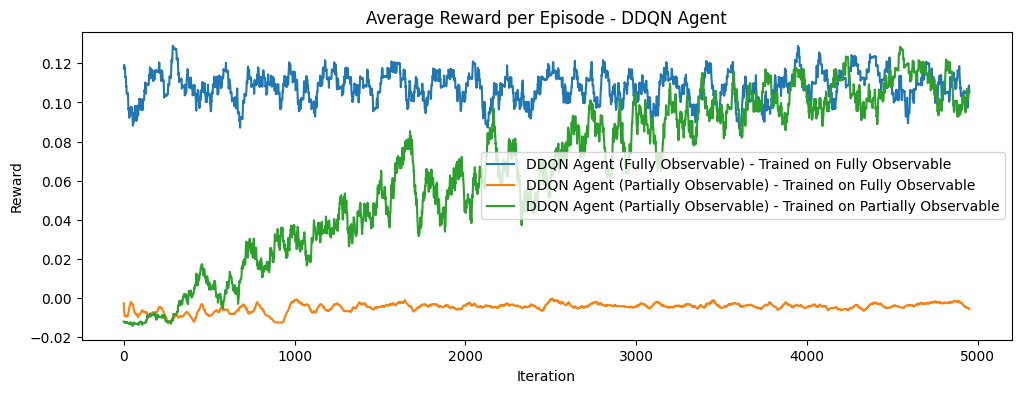

In [22]:
plt.figure(figsize=(12, 4))
plt.plot(moving_average(rewards_history_loaded_ddqn, window), label='DDQN Agent (Fully Observable) - Trained on Fully Observable')
plt.plot(moving_average(rewards_history_loaded_ddqn_po, window), label='DDQN Agent (Partially Observable) - Trained on Fully Observable')
plt.plot(moving_average(rewards_history_ddqn_po, window), label='DDQN Agent (Partially Observable) - Trained on Partially Observable')
plt.title('Average Reward per Episode - DDQN Agent')
plt.xlabel('Iteration')
plt.ylabel('Reward')
plt.legend()
plt.savefig("plots/rewards_ddqn.png", bbox_inches='tight')
plt.show()
plt.close()

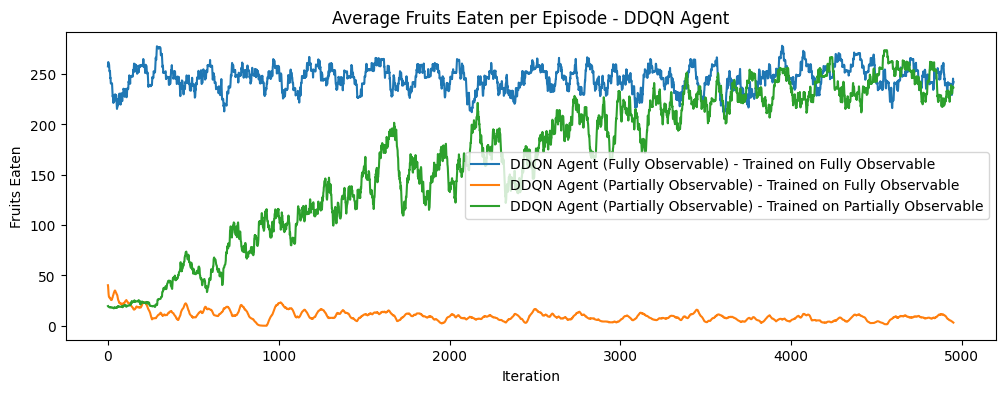

In [23]:
plt.figure(figsize=(12, 4))
plt.plot(moving_average(fruits_eaten_loaded_ddqn, window), label='DDQN Agent (Fully Observable) - Trained on Fully Observable')
plt.plot(moving_average(fruits_eaten_loaded_ddqn_po, window), label='DDQN Agent (Partially Observable) - Trained on Fully Observable')
plt.plot(moving_average(fruits_eaten_ddqn_po, window), label='DDQN Agent (Partially Observable) - Trained on Partially Observable')
plt.title('Average Fruits Eaten per Episode - DDQN Agent')
plt.xlabel('Iteration')
plt.ylabel('Fruits Eaten')
plt.legend()
plt.savefig("plots/fruits_eaten_ddqn.png", bbox_inches='tight')
plt.show()
plt.close()

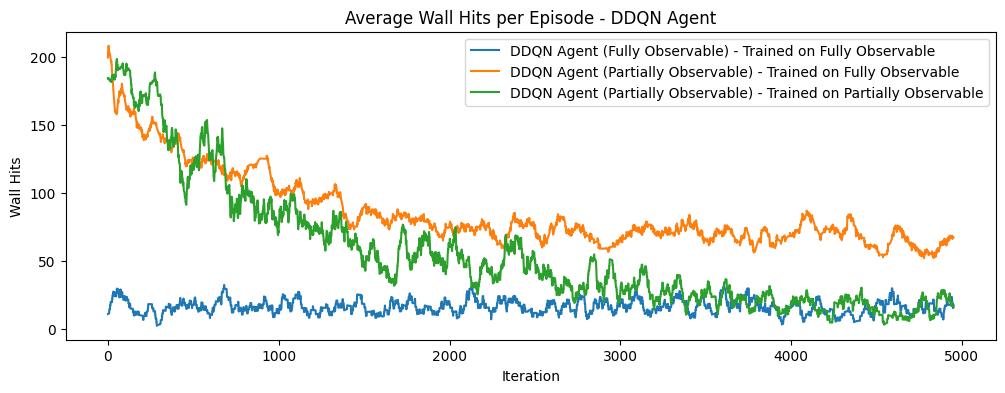

In [24]:
plt.figure(figsize=(12, 4))
plt.plot(moving_average(wall_hits_loaded_ddqn, window), label='DDQN Agent (Fully Observable) - Trained on Fully Observable')
plt.plot(moving_average(wall_hits_loaded_ddqn_po, window), label='DDQN Agent (Partially Observable) - Trained on Fully Observable')
plt.plot(moving_average(wall_hits_ddqn_po, window), label='DDQN Agent (Partially Observable) - Trained on Partially Observable')
plt.title('Average Wall Hits per Episode - DDQN Agent')
plt.xlabel('Iteration')
plt.ylabel('Wall Hits')
plt.legend()
plt.savefig("plots/wall_hits_ddqn.png", bbox_inches='tight')
plt.show()
plt.close()

## Heuristic/Baseline Policy

1. **Greedy move toward the fruit**: trying to reduce the Manhattan distance between the head of the snake and the fruit.
2. **Obstacle avoidance**: before moving in the greedy direction, ensure to not hit an obstacle or eat itself
3. **Fallback strategy**: if the snake cannot reach the greedy direction, try the second best one, and so forth so on

In [25]:
from baseline import heuristic_policy

env = get_env()
heuristic_rewards = []
fruits_eaten_heuristic = []
wall_hits_heuristic = []

for iteration in trange(ITERATIONS):
    actions = heuristic_policy(env)
    rewards = env.move(actions)
    wall_hits_count = np.sum(rewards == env.HIT_WALL_REWARD)
    wall_hits_heuristic.append(wall_hits_count)
    fruits_eaten_count = np.sum(rewards == env.FRUIT_REWARD)
    fruits_eaten_heuristic.append(fruits_eaten_count)
    heuristic_rewards.append(np.mean(rewards))

100%|██████████| 5000/5000 [03:17<00:00, 25.37it/s]


### Heuristic - Partially Observable Environment

In [26]:
env = get_env(partially_observable=True)
heuristic_rewards_po = []
fruits_eaten_heuristic_po = []
wall_hits_heuristic_po = []

for iteration in trange(ITERATIONS):
    actions = heuristic_policy(env)
    rewards = env.move(actions)
    wall_hits_count = np.sum(rewards == env.HIT_WALL_REWARD)
    wall_hits_heuristic_po.append(wall_hits_count)
    fruits_eaten_count = np.sum(rewards == env.FRUIT_REWARD)
    fruits_eaten_heuristic_po.append(fruits_eaten_count)
    heuristic_rewards_po.append(np.mean(rewards))

100%|██████████| 5000/5000 [03:16<00:00, 25.38it/s]


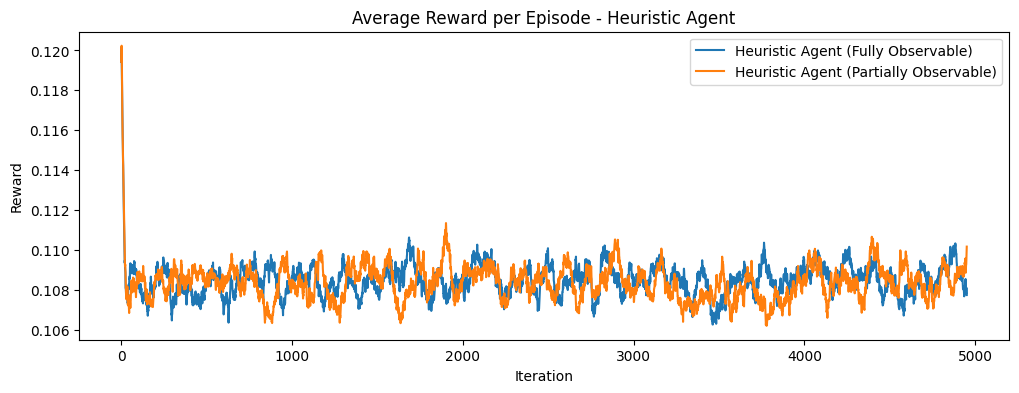

In [27]:
plt.figure(figsize=(12, 4))
plt.plot(moving_average(heuristic_rewards, window), label='Heuristic Agent (Fully Observable)')
plt.plot(moving_average(heuristic_rewards_po, window), label='Heuristic Agent (Partially Observable)')
plt.title('Average Reward per Episode - Heuristic Agent')
plt.xlabel('Iteration')
plt.ylabel('Reward')
plt.legend()
plt.savefig("plots/rewards_heuristic.png", bbox_inches='tight')
plt.show()
plt.close()

 ### Random policy reward
 
Just a baseline (not the one you are supposed to develop)

In [28]:
random_env = get_env(100)
random_rewards = []

for _ in trange(ITERATIONS):
    probs = tf.convert_to_tensor([[.25]*4]*random_env.n_boards)
    #sample actions
    actions =  tf.random.categorical(tf.math.log(probs), 1, dtype=tf.int32)
    # MDP update
    rewards = random_env.move(actions)
    random_rewards.append(np.mean(rewards))

100%|██████████| 5000/5000 [00:16<00:00, 305.80it/s]


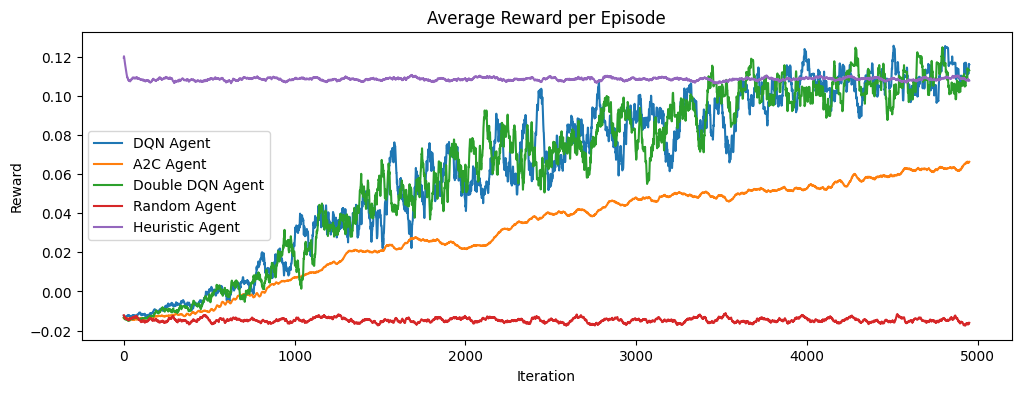

In [29]:
window = 50

def moving_average(data, window):
    return np.convolve(data, np.ones(window)/window, mode='valid')

plt.figure(figsize=(12, 4))

plt.plot(moving_average(rewards_history_dqn, window), label='DQN Agent')
plt.plot(moving_average(rewards_history_ac, window), label='A2C Agent')
plt.plot(moving_average(rewards_history_ddqn, window), label='Double DQN Agent')
plt.plot(moving_average(random_rewards, window), label='Random Agent')
plt.plot(moving_average(heuristic_rewards, window), label='Heuristic Agent')
plt.title('Average Reward per Episode')
plt.xlabel('Iteration')
plt.ylabel('Reward')
plt.legend()
plt.savefig("plots/rewards.png", bbox_inches='tight')
plt.show()
plt.close()

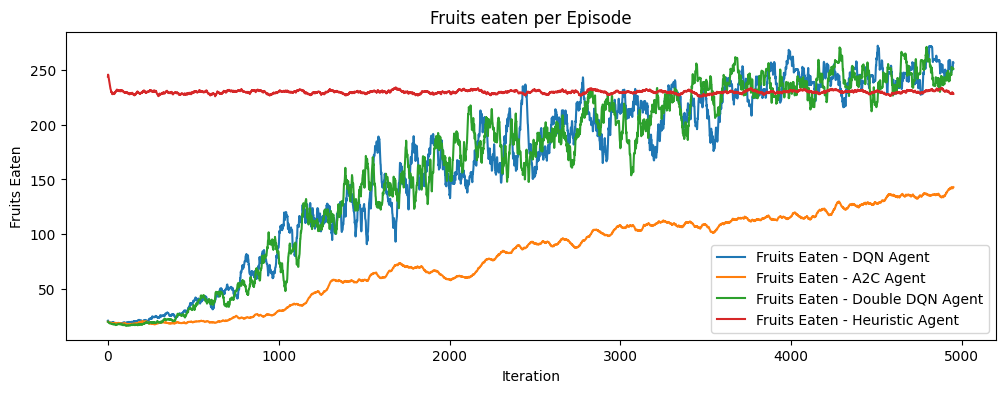

In [30]:
# Plot the fruits eaten
plt.figure(figsize=(12, 4))
plt.plot(moving_average(fruits_eaten_dqn, window), label='Fruits Eaten - DQN Agent')
plt.plot(moving_average(fruits_eaten_ac, window), label='Fruits Eaten - A2C Agent')
plt.plot(moving_average(fruits_eaten_ddqn, window), label='Fruits Eaten - Double DQN Agent')
plt.plot(moving_average(fruits_eaten_heuristic, window), label='Fruits Eaten - Heuristic Agent')
plt.title('Fruits eaten per Episode')
plt.xlabel('Iteration')
plt.ylabel('Fruits Eaten')
plt.legend()
plt.savefig("plots/fruits_eaten.png", bbox_inches='tight')
plt.show()
plt.close()

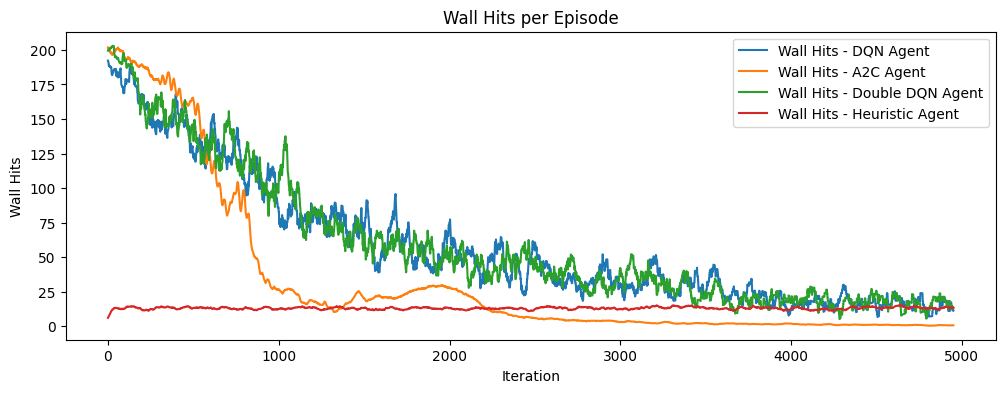

In [31]:
plt.figure(figsize=(12, 4))
plt.plot(moving_average(wall_hits_dqn, window), label='Wall Hits - DQN Agent')
plt.plot(moving_average(wall_hits_ac, window), label='Wall Hits - A2C Agent')
plt.plot(moving_average(wall_hits_ddqn, window), label='Wall Hits - Double DQN Agent')
plt.plot(moving_average(wall_hits_heuristic, window), label='Wall Hits - Heuristic Agent')
plt.title('Wall Hits per Episode')
plt.xlabel('Iteration')
plt.ylabel('Wall Hits')
plt.legend()
plt.savefig("plots/wall_hits.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()